<a href="https://colab.research.google.com/github/AfricanLeo/Leonora-Schreurs-Portfolio/blob/main/Unemployment20210329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment in South Africa

Unemployment in South Africa has reached crisis levels and current projections show no signs of improvement. The South African Government cites 6 reasons for the high unemployment. This notebook sets out to determines if there is data to support these theories.

Reasons cited by SA Government:


*   Legacy of apartheid and poor education as a result thereof


> The legacy of apartheid is difficult to compare as it was unique to South Africa, but the resulting poor education as a result can be measured using the Literacy rate, adult total (% of people ages 15 and above) from the ESG Dataset.

*   Labour demand and supply mismatch


> More jobseekers entering the jobmarket as more females are entering the jobmarket.   Population growth in South Africa outnumbers economic growth.

> Indented block




*   The effects of the 2008/2009 global recession and the covid-19 Pandemic


> The effect of the 2008/2009 global recession as well as the global covid-19 pandemic (added in for more complete evaluation) can be evaluated against the time line of events, comparing to what extent these two global events influenced unemployment. 


*   Role of trade union federations in government


> Trade union federations were central to the ANC's liberation fight against apartheid.  The problem is, however, that higher wages may lead to a decline in new employment.  Higher wages may be seen as a factor to improve quality of life, but the curveball of this upward trend is decreased employment opportunities as well as even greater numbers of unemployed youth. 


*   General lack of interest for entrepreneurship


> Research conducted by the South African government indicates a very low interest in the idea of owning and operating a business. Despite opportunities abound in informal settlements to hustle and trade, a permanent job, usually from government, is still seen as the holy grail. 


> Questions arise on how feasible it is to be an Entrepreneur, measured by two indicators: Ease of doing business index (1=most business-friendly regulations) and Individuals using the Internet (% of population)




*   Slow economic growth 


> To solve mass unemployment the economy needs to grow.  GDP growth over compared over time and against other African economies will shed more light on this issue.





# Importing Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import math
from matplotlib.colors import LinearSegmentedColormap

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline
rcParams['figure.figsize']= 12,8

## Importing the datasets

SOVEREIGN
ENVIRONMENTAL, SOCIAL, AND GOVERNANCE (ESG)DATA

Source: World Bank Group (WBG)

In [5]:
esg = pd.read_csv('/content/drive/MyDrive/PortfolioProjects/ESD_EDA/Data/ESGData.csv')

Since we will only be analysing data for the last 20 years, we willl drop the data for 1960 - 1999.

In [6]:
esg.drop(esg.iloc[:, 4:44], axis=1, inplace=True)


GDP (current US$) (NY.GDP.MKTP.CD)

Source: World Bank Group (WBG)

In [7]:
gdp = pd.read_csv('/content/drive/MyDrive/PortfolioProjects/ESD_EDA/Data/GDP-Current-US$__Data.csv')

## Custom Functions and Settings

#### Transposing datasets

In [8]:
def transpose_data(df_input, indicator, index1, index2):

  #list of columns to be transposed
  columns = df_input.columns.tolist()

  #reset index back as a column
  df_input.reset_index(inplace=True)
  df_input = df_input.rename(columns = {'index':index1})

  #set values and initialise lists
  i = 1
  all_dfs = []

  #for each row, 
  #transpose the column values into a df and add country as a column 
  #add df to the all_dfs list

  for country in df_input[index1]:
    df_row = 'df'+ str(i)
    df_row = pd.DataFrame(columns=[indicator])

    row = df_input[df_input[index1] == country]

    df_row = row[columns].transpose()

    df_row[index1] = country                   #add country
    df_row.columns = [indicator, index1]  #name columns uniformly
    all_dfs.append(df_row)                            #
    i +=1
  #Combine all row df's
  df_output = pd.concat(all_dfs)

  df_output.reset_index(inplace=True)
  df_output = df_output.rename(columns = {'index':index2})

  df_output = df_output[[index1, index2, indicator]]

  return df_output


# Exploratory Data Analysis & Data Cleaning

### ESG Dataset





The Sovereign Environmental, Social and Governance (ESG) dataset contains 17 key sustainable measurements spanning three categories namely Environmental, Social and Governance.

The World Bank Group (WBG) provides this information to investors help channel financial flows to more sustainable activities that are better aligned with the United Nation's Sustainable Development Goals. 

Source: [World Bank Group | Sovereign Environmental, Social and Governance Data](https://datatopics.worldbank.org/esg/) 

Let's inspect the dataset

In [9]:
esg.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,73.702495,74.944860,76.258066,77.120464,78.094440,79.062000,79.851681,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,78.479364,80.023047,77.999111,79.306311,79.537184,80.574728,84.621206,82.926878,83.644992,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,10.316367,8.050232,7.957603,9.539584,10.899546,13.506496,13.688121,12.303601,13.997417,8.721330,9.966140,13.002144,12.850205,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.031326,0.036476,0.039431,0.049157,0.038631,0.031945,0.034333,0.030291,0.042815,0.051040,0.052809,0.060245,0.061942,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916,NaN,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,36.310596,36.306582,36.369508,36.416650,36.484362,36.540501,36.489221,36.494163,36.412954,36.372261,36.425990,36.440808,36.472300,36.534503,36.607475,36.624759,36.610850,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16013 entries, 0 to 16012
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16013 non-null  object 
 1   Country Code    16013 non-null  object 
 2   Indicator Name  16013 non-null  object 
 3   Indicator Code  16013 non-null  object 
 4   2000            9812 non-null   float64
 5   2001            8350 non-null   float64
 6   2002            9909 non-null   float64
 7   2003            9557 non-null   float64
 8   2004            9737 non-null   float64
 9   2005            10067 non-null  float64
 10  2006            9822 non-null   float64
 11  2007            10189 non-null  float64
 12  2008            9777 non-null   float64
 13  2009            9953 non-null   float64
 14  2010            10309 non-null  float64
 15  2011            10066 non-null  float64
 16  2012            10338 non-null  float64
 17  2013            9745 non-null  

In [11]:
esg.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
count,9.812000e+03,8.350000e+03,9.909000e+03,9.557000e+03,9.737000e+03,1.006700e+04,9.822000e+03,1.018900e+04,9.777000e+03,9.953000e+03,1.030900e+04,1.006600e+04,1.033800e+04,9.745000e+03,9.859000e+03,9.593000e+03,8.566000e+03,7.421000e+03,6.698000e+03,4.260000e+03,463.000000,772.000000,0.0
mean,1.424971e+03,1.729432e+03,-8.128248e+03,1.628561e+03,1.731354e+03,1.868650e+03,2.026571e+03,-1.061163e+04,2.301458e+03,2.371731e+03,2.461652e+03,2.747217e+03,-7.212072e+03,3.322768e+03,3.474848e+03,3.762180e+03,4.630373e+03,-6.139049e+03,6.505281e+03,4.643040e+03,16.247165,188.026093,NaN
std,2.700645e+04,2.980715e+04,5.410763e+05,2.947864e+04,3.128782e+04,3.382428e+04,3.558686e+04,6.329394e+05,3.904591e+04,4.016833e+04,4.167602e+04,4.531094e+04,5.430183e+05,5.313861e+04,5.577948e+04,6.026021e+04,7.083935e+04,5.627317e+05,8.818800e+04,7.612979e+04,12.757991,392.160646,NaN
min,-1.938662e+03,-1.596408e+03,-1.863728e+07,-1.169752e+03,-1.145385e+03,-1.154607e+03,-1.014529e+03,-2.310925e+07,-1.007252e+03,-9.900618e+02,-9.448928e+02,-6.721127e+02,-1.816900e+07,-6.723950e+02,-1.058120e+03,-5.813466e+02,-1.019039e+01,-1.585383e+07,-6.356339e+00,-8.100000e+00,0.000000,-17.135000,NaN
25%,1.171419e+00,2.639348e+00,1.020630e+00,1.131860e+00,1.170000e+00,1.287204e+00,1.251434e+00,1.179258e+00,1.234297e+00,1.050537e+00,1.567310e+00,1.461328e+00,1.328461e+00,2.084000e+00,2.075056e+00,2.045292e+00,1.843108e+00,1.197893e+00,1.232455e+00,9.886725e-01,6.406940,0.000000,NaN
50%,1.156871e+01,1.594495e+01,9.710570e+00,1.020000e+01,1.071000e+01,1.171195e+01,1.093294e+01,1.091682e+01,1.127000e+01,1.029266e+01,1.295878e+01,1.297153e+01,1.291502e+01,1.469907e+01,1.496977e+01,1.351000e+01,1.289329e+01,8.900000e+00,7.706074e+00,6.640412e+00,12.790000,4.773630,NaN
75%,5.943099e+01,6.793311e+01,6.021137e+01,5.967000e+01,6.026037e+01,5.945010e+01,6.083154e+01,6.229827e+01,6.181811e+01,6.088321e+01,6.070275e+01,6.228313e+01,6.290838e+01,6.415407e+01,6.432680e+01,6.042403e+01,6.160000e+01,6.010515e+01,6.021250e+01,4.642214e+01,23.416937,55.523075,NaN
max,1.067910e+06,1.105882e+06,1.817917e+07,1.209557e+06,1.324240e+06,1.488551e+06,1.569369e+06,2.260562e+07,1.749904e+06,1.853967e+06,1.943521e+06,2.043640e+06,1.799204e+07,2.175429e+06,2.263604e+06,2.294558e+06,2.376420e+06,1.640971e+07,2.554373e+06,2.144825e+06,105.811691,1583.820000,NaN


The 67 ESG Indicators listed alphabetically

In [12]:
print(len(esg['Indicator Name'].unique()))
esg['Indicator Name'].unique()

67


array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)',
       'CO2 emissions (metric tons per capita)',
       'Control of Corruption: Estimate',
       'Cooling Degree Days (projected change in number of degree Celsius)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'E

### ESG for Africa

The aim of this section is to extract the African continent countries into a subset and add a column to indicate the region.

We have used the 5 regions as identified by the [UN Statistics Division](https://unstats.un.org/).

The regions are:


*   Northern Africa
*   Western Africa
*   Eastern Africa
*   Middle Africa
*   Southern Africa

Create lists of country names for each region and combine a list for the whole continent

In [13]:
western_africa_list = ['Benin', 'Burkina Faso', 'Cabo Verde', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', "Cote d'Ivoire",
                  'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']

In [14]:
southern_africa_list = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa']

In [15]:
middle_africa_list = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.',
                 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']

In [16]:
eastern_africa_list = ['Burundi', 'Comoros', 'Ethiopia', 'Eritrea', 'Djibouti', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius',
                  'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe']

In [17]:
northern_africa_list = ['Algeria', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Egypt, Arab Rep.']

In [18]:
africa_list = western_africa_list + southern_africa_list + middle_africa_list + eastern_africa_list + northern_africa_list

In [19]:
len(africa_list)

54

Create a sub-set for the 54 Africa countries in the ESG dataset and add a column for the region of each. 


In [20]:
esg_africa = esg[esg['Country Name'].isin(africa_list)]

In [21]:
len(esg_africa)

3618

Add a column with the Region of each country and set the Country Name  as index. 

In [22]:
southern_africa = esg['Country Name'].isin(southern_africa_list)
western_africa  = esg['Country Name'].isin(western_africa_list)
eastern_africa  = esg['Country Name'].isin(eastern_africa_list)
middle_africa   = esg['Country Name'].isin(middle_africa_list)
northern_africa = esg['Country Name'].isin(northern_africa_list)

In [23]:
esg_africa['Region'] = 'Others'
esg_africa['Region'][southern_africa] = 'Southern Africa'
esg_africa['Region'][western_africa]  = 'Western Africa'
esg_africa['Region'][eastern_africa]  = 'Eastern Africa'
esg_africa['Region'][middle_africa]   = 'Middle Africa'
esg_africa['Region'][northern_africa] = 'Northern Africa'

In [24]:
esg_africa.set_index('Country Name', inplace=True)

Inspect the dataset

In [25]:
esg_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3618 entries, Algeria to Zimbabwe
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    3618 non-null   object 
 1   Indicator Name  3618 non-null   object 
 2   Indicator Code  3618 non-null   object 
 3   2000            2151 non-null   float64
 4   2001            1735 non-null   float64
 5   2002            2172 non-null   float64
 6   2003            2066 non-null   float64
 7   2004            2109 non-null   float64
 8   2005            2196 non-null   float64
 9   2006            2131 non-null   float64
 10  2007            2192 non-null   float64
 11  2008            2097 non-null   float64
 12  2009            2140 non-null   float64
 13  2010            2252 non-null   float64
 14  2011            2191 non-null   float64
 15  2012            2236 non-null   float64
 16  2013            2092 non-null   float64
 17  2014            2136 non-nul

### GDP Dataset

Gross Domestic Product (GDP) is a common way to measure the size of a country's economy. 

GDP is the value of all final goods and services produced within a country in a given year.

GDP figures are in current U.S. dollars and spans data from 1990 to 2019. 

Source:  [World Bank Group | DataBank | World Development Indicators | GDP(Current US$)](https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#)

In [26]:
gdp.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,17804292964.1045,20001598505.7042,20561069558.2152,20484885119.7348,19907111418.9938,18017749073.9033,18869945677.9599,18353881129.881,19291104007.8299,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2028553750,3480355188.60063,12890765324.2256,12319830252.4768,12776217194.7928,13228144008.3428,11386846319.1589,11861200797.4706,13019693450.8816,15147020535.3869,15279183289.9372,..
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,62045099642.7774,54790233855.966,200254371997.255,209021250805.932,209724351221.97,213860450595.829,166361491140.753,159994837855.12,170163165960.516,175405660377.358,171091289782.245,..
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,574000000,644000000,641000000,642000000,661000000,652000000,602000000,636000000,..,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,1029048481.88051,1429049198.45218,3629203786.19154,3188808942.56713,3193704343.20627,3271808157.30038,2789870187.50693,2896679211.86628,3000180750.11297,3218316013.22626,3154057987.23833,..


In [27]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    266 non-null    object
 1   Series Code    264 non-null    object
 2   Country Name   264 non-null    object
 3   Country Code   264 non-null    object
 4   1990 [YR1990]  264 non-null    object
 5   2000 [YR2000]  264 non-null    object
 6   2011 [YR2011]  264 non-null    object
 7   2012 [YR2012]  264 non-null    object
 8   2013 [YR2013]  264 non-null    object
 9   2014 [YR2014]  264 non-null    object
 10  2015 [YR2015]  264 non-null    object
 11  2016 [YR2016]  264 non-null    object
 12  2017 [YR2017]  264 non-null    object
 13  2018 [YR2018]  264 non-null    object
 14  2019 [YR2019]  264 non-null    object
 15  2020 [YR2020]  264 non-null    object
dtypes: object(16)
memory usage: 33.8+ KB


### GDP Africa

Sub-set a dataframe with GDP data for African Countries.

In [28]:
gdp_africa = gdp[gdp['Country Name'].isin(africa_list)]

In [29]:
gdp_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 216
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    54 non-null     object
 1   Series Code    54 non-null     object
 2   Country Name   54 non-null     object
 3   Country Code   54 non-null     object
 4   1990 [YR1990]  54 non-null     object
 5   2000 [YR2000]  54 non-null     object
 6   2011 [YR2011]  54 non-null     object
 7   2012 [YR2012]  54 non-null     object
 8   2013 [YR2013]  54 non-null     object
 9   2014 [YR2014]  54 non-null     object
 10  2015 [YR2015]  54 non-null     object
 11  2016 [YR2016]  54 non-null     object
 12  2017 [YR2017]  54 non-null     object
 13  2018 [YR2018]  54 non-null     object
 14  2019 [YR2019]  54 non-null     object
 15  2020 [YR2020]  54 non-null     object
dtypes: object(16)
memory usage: 7.2+ KB


At first glance it appears as if the dataset has no missing values.

The GDP numbers are in object format and should first be converted to float. 

Since the aim of this data is simply to find economies similar in size to South Africa and compare their respective unemployment rates with that of South Africa, we will only use the GDP numbers from the last 5 years, 2016 to 2020. 

Some columns are redundant, however, and will be dropped from the dataset. These are Series Name (col 0), Series Code (col 1), Country Code (col 3), 1990 to 2015 (cols 4 to 10). 


In [30]:
gdp_africa.drop(gdp_africa.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]], axis=1, inplace=True)


In [31]:
gdp_africa['2016 [YR2016]'] = pd.to_numeric(gdp_africa['2016 [YR2016]'], errors='coerce')
gdp_africa['2017 [YR2017]'] = pd.to_numeric(gdp_africa['2017 [YR2017]'], errors='coerce')
gdp_africa['2018 [YR2018]'] = pd.to_numeric(gdp_africa['2018 [YR2018]'], errors='coerce')
gdp_africa['2019 [YR2019]'] = pd.to_numeric(gdp_africa['2019 [YR2019]'], errors='coerce')
gdp_africa['2020 [YR2020]'] = pd.to_numeric(gdp_africa['2020 [YR2020]'], errors='coerce')

Check for missing values

In [32]:
gdp_africa.isnull().sum()

Country Name      0
2016 [YR2016]     3
2017 [YR2017]     3
2018 [YR2018]     3
2019 [YR2019]     3
2020 [YR2020]    54
dtype: int64

*   Having converted the object type columns to float, it now becomes apparent that 2020's numbers have not been updated in this dataset and are represented as NaN values. We will drop the 2020 column in the dataset and instead use the 2016 to 2019 values.

In [33]:
gdp_africa.drop(gdp_africa.iloc[:, -1:], axis=1, inplace=True)

*   We can also see that there are 3 values missing (NaN) in the dataset.  Let's print them out.

In [34]:
print(gdp_africa[gdp_africa.isnull().any(axis=1)])

    Country Name  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]
61       Eritrea            NaN            NaN            NaN            NaN
176      Somalia            NaN            NaN            NaN            NaN
178  South Sudan            NaN            NaN            NaN            NaN


*   Eritrea, Somalia and South Sudan are the countries for which the dataset does not have values.

*   Since the goal of importing this data is to find economies that are similar in size to that of South Africa, it should be safe to drop these rows from the dataset. 

In [35]:
gdp_africa.dropna(axis=0, inplace=True)

In [36]:
gdp_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 2 to 216
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   51 non-null     object 
 1   2016 [YR2016]  51 non-null     float64
 2   2017 [YR2017]  51 non-null     float64
 3   2018 [YR2018]  51 non-null     float64
 4   2019 [YR2019]  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


Set the Country as index in the dataframe and inspect the data.

In [37]:
gdp_africa.set_index('Country Name', inplace=True)

In [38]:
gdp_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Algeria to Zimbabwe
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2016 [YR2016]  51 non-null     float64
 1   2017 [YR2017]  51 non-null     float64
 2   2018 [YR2018]  51 non-null     float64
 3   2019 [YR2019]  51 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [39]:
gdp_africa.describe()

,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,4.296850e+10,4.355746e+10,4.593347e+10,4.779078e+10
std,8.299471e+10,7.911286e+10,8.297871e+10,8.906720e+10
min,3.454954e+08,3.756146e+08,4.122618e+08,4.186374e+08
25%,4.151499e+09,4.611461e+09,5.014897e+09,4.980936e+09
50%,1.193700e+10,1.321908e+10,1.425099e+10,1.439071e+10
75%,3.946801e+10,3.891085e+10,4.330082e+10,4.470405e+10
max,4.046500e+11,3.757465e+11,3.971905e+11,4.481204e+11


In [40]:
gdp_africa.loc[['South Africa']]

,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Name,,,,
South Africa,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11


South Africa's GDP is in the top quartile, so lets print the top ten values using 2019's GDP and see how South Africa compares. 

In [41]:
gdp_africa_10 = gdp_africa.sort_values(by='2019 [YR2019]', ascending=False)[:10]
gdp_africa_10

,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Name,,,,
Nigeria,4.046500e+11,3.757465e+11,3.971905e+11,4.481204e+11
South Africa,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11
"Egypt, Arab Rep.",3.324417e+11,2.357337e+11,2.497130e+11,3.030923e+11
Algeria,1.599948e+11,1.701632e+11,1.754057e+11,1.710913e+11
Morocco,1.033116e+11,1.096827e+11,1.180962e+11,1.197003e+11
Ethiopia,7.429662e+10,8.177079e+10,8.426935e+10,9.591259e+10
Kenya,6.918876e+10,7.896500e+10,8.777858e+10,9.550309e+10
Angola,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10
Ghana,5.500973e+10,5.899813e+10,6.555646e+10,6.698363e+10


Since South Africa is in the top ten, we can use these countries as a first group for comparison.  

For each of these countries, we can now isolate asociated factors and how it influences unemployment in other economies in Africa.

In [42]:
gdp_africa_10_names = gdp_africa_10.index.tolist()
gdp_africa_10_names

['Nigeria',
 'South Africa',
 'Egypt, Arab Rep.',
 'Algeria',
 'Morocco',
 'Ethiopia',
 'Kenya',
 'Angola',
 'Ghana',
 'Tanzania']

Transpose data for visualisation purposes

In [43]:
gdp_africa_10 = transpose_data(gdp_africa_10, 'GDP', 'Country Name', 'Year')

In [44]:
gdp_africa_10.head()

,Country Name,Year,GDP
0,Nigeria,2016 [YR2016],4.046500e+11
1,Nigeria,2017 [YR2017],3.757465e+11
2,Nigeria,2018 [YR2018],3.971905e+11
3,Nigeria,2019 [YR2019],4.481204e+11
4,South Africa,2016 [YR2016],2.963573e+11


### Unemployment in Africa


Create and explore an Unemployment data sub-set for African countries

In [45]:
cond_unempl = esg_africa['Indicator Name'] == 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

unemployment_africa = esg_africa[cond_unempl]
unemployment_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Algeria to Zimbabwe
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    54 non-null     object 
 1   Indicator Name  54 non-null     object 
 2   Indicator Code  54 non-null     object 
 3   2000            53 non-null     float64
 4   2001            53 non-null     float64
 5   2002            53 non-null     float64
 6   2003            53 non-null     float64
 7   2004            53 non-null     float64
 8   2005            53 non-null     float64
 9   2006            53 non-null     float64
 10  2007            53 non-null     float64
 11  2008            53 non-null     float64
 12  2009            53 non-null     float64
 13  2010            53 non-null     float64
 14  2011            53 non-null     float64
 15  2012            53 non-null     float64
 16  2013            53 non-null     float64
 17  2014            53 non-null   

Clean Dataset




Drop redundant columns including Indicator Code, Indicator Name and Country Code, 2050 projections and the unnamed column. 

In [46]:
unemployment_africa.drop(unemployment_africa.iloc[:, [0,1,2,24,25,26]], axis=1, inplace=True)

Check for missing values.

In [47]:
unemployment_africa.isnull().sum()

2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
2019    1
2020    1
dtype: int64

The dataset has some missing values.   We will print these and decide on a strategy to handle them. 

In [48]:
print(unemployment_africa[unemployment_africa.isnull().any(axis=1)])


              2000  2001  2002  2003  2004  ...  2016  2017  2018  2019  2020
Country Name                                ...                              
Seychelles     NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[1 rows x 21 columns]


It is clear that there is no employment statistics available for the Seychelles for any of the years, so we will drop this row in totality from the dataset.

In [49]:
unemployment_africa.dropna(axis=0, inplace=True)
unemployment_africa.isnull().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

Inspect the data.

In [50]:
unemployment_africa.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Algeria,29.77,27.299999,25.900000,23.719999,17.65,15.27,12.270000,13.79,11.33,10.16,9.960000,9.96,10.970000,9.820000,10.210000,11.210000,10.200000,12.000000,11.89,11.810000,12.830000
Angola,3.87,3.850000,3.880000,3.880000,3.85,3.81,3.730000,3.66,3.63,3.78,9.430000,7.36,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.00,6.930000,7.700000
Benin,0.84,0.750000,0.690000,0.730000,0.77,0.80,0.810000,0.82,0.85,0.97,1.040000,2.65,2.650000,2.660000,2.610000,2.570000,2.520000,2.440000,2.37,2.320000,2.540000
Botswana,15.88,18.540001,21.129999,23.799999,21.76,19.77,17.780001,17.00,16.35,16.17,17.860001,17.85,17.860001,17.879999,17.780001,17.709999,17.620001,17.459999,17.32,17.209999,17.700001
Burkina Faso,2.57,2.630000,2.710000,2.780000,3.37,4.00,3.640000,3.30,3.62,4.23,4.680000,5.12,5.580000,6.070000,6.480000,6.040000,5.600000,5.130000,4.70,4.620000,4.960000


The dataset has unemployment data for 53 countries, which is difficult to compare and visualise all on one graph.

We will first subset the data into regions and compare those.

In [51]:
unempl_na = unemployment_africa[unemployment_africa.index.isin(northern_africa_list)]
unempl_ea = unemployment_africa[unemployment_africa.index.isin(eastern_africa_list)]
unempl_wa = unemployment_africa[unemployment_africa.index.isin(western_africa_list)]
unempl_ma = unemployment_africa[unemployment_africa.index.isin(middle_africa_list)]
unempl_sa = unemployment_africa[unemployment_africa.index.isin(southern_africa_list)]

Inspect the data for each region. 

Northern Africa

In [52]:
unempl_na.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Algeria,29.770000,27.299999,25.90,23.719999,17.650000,15.27,12.270000,13.79,11.33,10.160000,9.960000,9.960000,10.970000,9.820000,10.210000,11.210000,10.200000,12.000000,11.890000,11.81,12.830000
"Egypt, Arab Rep.",8.980000,9.260000,10.01,11.010000,10.320000,11.20,10.490000,8.80,8.52,9.090000,8.760000,11.850000,12.600000,13.150000,13.110000,13.050000,12.410000,11.740000,9.820000,9.73,10.450000
Libya,19.190001,19.160000,19.23,19.230000,19.139999,19.02,18.799999,18.60,18.51,18.950001,19.030001,19.020000,19.030001,19.049999,18.940001,18.870001,18.770000,18.610001,18.459999,18.34,19.389999
Morocco,13.580000,12.460000,11.59,11.920000,10.830000,11.01,9.670000,9.56,9.57,8.960000,9.090000,8.910000,8.990000,9.230000,9.700000,9.460000,9.300000,9.190000,9.080000,9.01,10.150000
Sudan,15.450000,15.410000,15.48,15.480000,15.400000,15.28,15.070000,14.88,14.80,13.000000,15.170000,17.440001,17.450001,17.469999,17.360001,17.290001,17.190001,17.020000,16.870001,16.76,17.709999


Eastern Africa

In [53]:
unempl_ea.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Burundi,1.87,1.86,1.89,1.89,1.85,1.81,1.73,1.66,1.63,1.75,1.74,1.70,1.67,1.64,1.57,1.55,1.53,1.48,1.45,1.42,0.80
Comoros,4.59,4.58,4.61,4.61,4.57,4.84,5.07,5.30,5.59,6.19,6.60,6.98,7.39,7.81,8.14,8.09,8.01,7.89,7.78,7.70,8.43
Djibouti,11.66,11.63,11.69,11.69,11.62,11.52,11.34,11.17,11.10,11.46,11.52,11.51,11.52,11.54,11.45,11.39,11.31,11.18,11.06,10.97,11.57
Eritrea,6.87,6.85,6.89,6.89,6.84,6.76,6.62,6.50,6.44,6.72,6.76,6.76,6.77,6.78,6.71,6.66,6.60,6.50,6.41,6.34,7.44
Ethiopia,3.49,3.28,3.11,2.92,2.71,2.50,2.39,2.29,2.24,2.35,2.34,2.30,2.28,2.25,2.22,2.20,2.17,2.12,2.07,2.04,2.79


Western Africa

In [54]:
unempl_wa.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Benin,0.84,0.75,0.69,0.73,0.77,0.80,0.81,0.82,0.85,0.97,1.04,2.65,2.65,2.66,2.61,2.57,2.52,2.44,2.37,2.32,2.54
Burkina Faso,2.57,2.63,2.71,2.78,3.37,4.00,3.64,3.30,3.62,4.23,4.68,5.12,5.58,6.07,6.48,6.04,5.60,5.13,4.70,4.62,4.96
Cabo Verde,10.79,10.76,10.81,10.81,10.75,10.67,10.51,10.37,10.31,10.62,10.67,10.93,11.21,11.49,11.69,11.90,12.10,12.24,12.17,12.07,13.41
Cote d'Ivoire,4.52,4.71,4.96,5.18,5.36,5.51,5.61,5.71,5.88,6.41,6.71,6.96,7.22,4.25,3.65,3.10,2.60,3.27,3.21,3.17,3.50
"Gambia, The",9.53,9.51,9.56,9.56,9.50,9.41,9.26,9.12,9.05,9.36,9.41,9.41,9.42,9.43,9.35,9.30,9.24,9.12,9.02,8.94,9.64


Middle Africa

In [55]:
unempl_ma.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,3.87,3.85,3.88,3.88,3.85,3.81,3.73,3.66,3.63,3.78,9.43,7.36,7.37,7.38,7.31,7.26,7.20,7.10,7.00,6.93,7.70
Cameroon,7.60,7.46,6.68,5.90,5.13,4.40,3.69,3.06,3.31,3.77,4.11,3.97,3.84,3.71,3.53,3.51,3.47,3.41,3.36,3.32,3.62
Central African Republic,4.47,4.45,4.49,4.49,4.44,4.38,4.27,4.17,4.12,4.34,4.38,4.38,4.38,4.39,4.34,4.30,4.25,4.17,4.09,4.04,4.33
Chad,1.05,1.09,1.16,1.22,1.26,1.29,1.28,1.29,1.32,1.50,1.59,1.66,1.73,1.80,1.83,1.87,1.89,1.89,1.89,1.91,2.26
"Congo, Dem. Rep.",2.91,2.90,2.92,2.92,2.89,2.85,2.98,3.11,3.29,3.70,3.98,4.22,4.49,4.49,4.44,4.40,4.35,4.26,4.18,4.13,4.55


Southern Africa

In [56]:
unempl_sa

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Botswana,15.880000,18.540001,21.129999,23.799999,21.760000,19.770000,17.780001,17.000000,16.350000,16.170000,17.860001,17.850000,17.860001,17.879999,17.780001,17.709999,17.620001,17.459999,17.320000,17.209999,17.700001
Eswatini,24.400000,25.000000,25.740000,26.389999,26.959999,27.469999,27.850000,28.240000,27.450001,27.389999,26.820000,26.150000,25.520000,24.900000,24.139999,23.440001,22.719999,22.540001,22.370001,22.240000,23.400000
Lesotho,35.270000,34.349998,33.580002,32.720001,31.770000,30.780001,29.690001,28.650000,27.760000,27.500000,26.809999,26.040001,25.299999,24.580000,24.469999,24.400000,24.299999,24.129999,23.980000,23.860001,24.650000
Namibia,20.299999,20.719999,21.250000,21.709999,22.090000,21.980000,21.760000,21.559999,21.480000,21.990000,22.100000,19.330000,16.770000,19.030001,18.520000,20.889999,23.350000,21.570000,19.879999,19.750000,20.350000
South Africa,29.879999,30.690001,33.290001,32.310001,29.450001,29.120001,28.340000,26.540001,22.410000,23.520000,24.680000,24.639999,24.730000,24.559999,24.889999,25.150000,26.540001,27.040001,26.910000,28.469999,28.740000


In [57]:
unempl_sa_t = unempl_sa.transpose()
unempl_sa_t.head()

Country Name,Botswana,Eswatini,Lesotho,Namibia,South Africa
2000,15.880000,24.400000,35.270000,20.299999,29.879999
2001,18.540001,25.000000,34.349998,20.719999,30.690001
2002,21.129999,25.740000,33.580002,21.250000,33.290001
2003,23.799999,26.389999,32.720001,21.709999,32.310001
2004,21.760000,26.959999,31.770000,22.090000,29.450001


In [58]:
unempl_sa_t.drop(['South Africa'], axis=1, inplace=True)

In [59]:
unempl_sa_t.head()

Country Name,Botswana,Eswatini,Lesotho,Namibia
2000,15.880000,24.400000,35.270000,20.299999
2001,18.540001,25.000000,34.349998,20.719999
2002,21.129999,25.740000,33.580002,21.250000
2003,23.799999,26.389999,32.720001,21.709999
2004,21.760000,26.959999,31.770000,22.090000


Extract the data for South Africa into a seperate dataframe for comparison, drop the index to a 'Year' column.

In [60]:
unempl_rsa = pd.DataFrame({'South Africa': unemployment_africa.loc['South Africa'] }) 
unempl_rsa = unempl_rsa.reset_index()
unempl_rsa = unempl_rsa.rename(columns = {'index':'Year'})

Inspect the data

In [61]:
unempl_rsa.head()

,Year,South Africa
0,2000,29.879999
1,2001,30.690001
2,2002,33.290001
3,2003,32.310001
4,2004,29.450001


Calculate the average unemployment rate per region and construct a dataframe with the information. 

In [62]:
unempl_region = pd.DataFrame({'Northern Africa': unempl_na.mean(), 
                              'Eastern Africa': unempl_ea.mean(),
                              'Western Africa': unempl_wa.mean(),
                              'Middle Africa': unempl_ma.mean(),
                              'Southern Africa': unempl_sa.mean(),
                              })
unempl_region.reset_index(inplace=True)
unempl_region.rename(columns = {'index':'Year'}, inplace=True)

In [63]:
unempl_region.head()

,Year,Northern Africa,Eastern Africa,Western Africa,Middle Africa,Southern Africa
0,2000,16.985000,6.285882,5.173750,8.914444,25.146
1,2001,16.331666,6.261765,5.151875,9.027778,25.860
2,2002,16.126667,6.268824,5.208750,9.184444,26.998
3,2003,15.978333,6.286471,5.316250,8.953333,27.386
4,2004,14.595000,6.140588,5.432500,8.802222,26.406


### Unemployment in the Top Ten African Economies

In [64]:
unempl_africa_10 = unemployment_africa[unemployment_africa.index.isin(gdp_africa_10_names)]
unempl_africa_10


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Algeria,29.770000,27.299999,25.900000,23.719999,17.650000,15.270000,12.27,13.790000,11.33,10.16,9.96,9.960000,10.97,9.820000,10.210000,11.21,10.200000,12.000000,11.89,11.810000,12.83
Angola,3.870000,3.850000,3.880000,3.880000,3.850000,3.810000,3.73,3.660000,3.63,3.78,9.43,7.360000,7.37,7.380000,7.310000,7.26,7.200000,7.100000,7.00,6.930000,7.70
"Egypt, Arab Rep.",8.980000,9.260000,10.010000,11.010000,10.320000,11.200000,10.49,8.800000,8.52,9.09,8.76,11.850000,12.60,13.150000,13.110000,13.05,12.410000,11.740000,9.82,9.730000,10.45
Ethiopia,3.490000,3.280000,3.110000,2.920000,2.710000,2.500000,2.39,2.290000,2.24,2.35,2.34,2.300000,2.28,2.250000,2.220000,2.20,2.170000,2.120000,2.07,2.040000,2.79
Ghana,10.360000,9.260000,8.300000,7.340000,6.400000,5.500000,4.64,4.690000,4.79,5.14,5.32,5.620000,5.93,6.260000,6.520000,6.81,5.450000,4.220000,4.16,4.120000,4.53
Kenya,2.930000,2.910000,2.940000,2.940000,2.910000,2.860000,2.77,2.690000,2.66,2.83,2.86,2.860000,2.86,2.870000,2.820000,2.80,2.760000,2.690000,2.64,2.600000,2.98
Morocco,13.580000,12.460000,11.590000,11.920000,10.830000,11.010000,9.67,9.560000,9.57,8.96,9.09,8.910000,8.99,9.230000,9.700000,9.46,9.300000,9.190000,9.08,9.010000,10.15
Nigeria,3.830000,3.820000,3.850000,3.840000,3.810000,3.770000,3.69,3.620000,3.59,3.75,3.77,3.770000,3.74,3.700000,4.560000,4.31,7.060000,8.390000,8.45,8.530000,9.01
South Africa,29.879999,30.690001,33.290001,32.310001,29.450001,29.120001,28.34,26.540001,22.41,23.52,24.68,24.639999,24.73,24.559999,24.889999,25.15,26.540001,27.040001,26.91,28.469999,28.74


In [65]:
unempl_africa_10.mean(axis=1)

Country Name
Algeria             14.667619
Angola               5.713333
Egypt, Arab Rep.    10.683333
Ethiopia             2.479048
Ghana                5.969524
Kenya                2.818095
Morocco             10.060000
Nigeria              4.898095
South Africa        27.233333
Tanzania             2.729524
dtype: float64

### Associated Factors

In this section we explore the data in the ESG dataset to see if we can find any evidence in the data to support the reasons for the high unemployment rate in South Africa.

Conditions to extract the associated factors from the ESG dataset that are related to unemployment as well as measurements that cited as reasons for the current high unemployment. 

In [66]:
cond_africa10   = esg_africa.index.isin(gdp_africa_10_names)
cond_labourpart = esg_africa['Indicator Name'] == 'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'
cond_femlabpart = esg_africa['Indicator Name'] == 'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'
cond_litrate    = esg_africa['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)'
cond_gini       = esg_africa['Indicator Name'] == 'Gini index (World Bank estimate)'
cond_gdpgrowth  = esg_africa['Indicator Name'] == 'GDP growth (annual %)'
cond_easebus    = esg_africa['Indicator Name'] == 'Ease of doing business index (1=most business-friendly regulations)'
cond_internet   = esg_africa['Indicator Name'] == 'Individuals using the Internet (% of population)'
cond_poverty    = esg_africa['Indicator Name'] == 'Poverty headcount ratio at national poverty lines (% of population)'

#### Labour Force Participation

**Labour force participation rate** , total (% of total population ages 15-64) (modeled ILO estimate)

In [67]:
labourpart_africa = esg_africa[cond_africa10 & cond_labourpart]
labourpart_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            10 non-null     float64
 4   2001            10 non-null     float64
 5   2002            10 non-null     float64
 6   2003            10 non-null     float64
 7   2004            10 non-null     float64
 8   2005            10 non-null     float64
 9   2006            10 non-null     float64
 10  2007            10 non-null     float64
 11  2008            10 non-null     float64
 12  2009            10 non-null     float64
 13  2010            10 non-null     float64
 14  2011            10 non-null     float64
 15  2012            10 non-null     float64
 16  2013            10 non-null     float64
 17  2014            10 non-null   

Remove redundant columns as well as columns with no data (2020)

In [68]:
labourpart_africa.drop(labourpart_africa.iloc[:, [0,1,2,23,24,25,26]], axis=1, inplace=True)

Check for missing values

In [69]:
labourpart_africa.isnull().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64

Inspect the data

In [70]:
labourpart_africa

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,
Algeria,46.160000,45.930000,45.730000,45.560001,45.410000,45.290001,45.200001,45.130001,45.080002,45.060001,45.320000,45.580002,45.880001,46.959999,44.779999,45.320000,45.860001,46.389999,46.410000,46.369999
Angola,78.070000,78.040001,77.919998,77.860001,77.760002,77.660004,77.680000,77.680000,77.699997,77.790001,77.839996,77.959999,78.019997,78.070000,78.089996,78.089996,78.120003,78.089996,78.029999,77.930000
"Egypt, Arab Rep.",48.950001,48.580002,48.220001,48.700001,49.180000,49.630001,50.029999,51.060001,50.980000,51.570000,52.000000,51.799999,52.180000,52.779999,52.860001,51.070000,50.680000,49.360001,47.910000,47.869999
Ethiopia,81.620003,82.059998,82.489998,82.919998,83.330002,83.709999,83.599998,83.480003,83.349998,83.199997,83.059998,82.930000,82.809998,82.699997,82.410004,82.120003,81.910004,81.690002,81.510002,81.339996
Ghana,75.570000,75.010002,74.449997,73.879997,73.320000,72.790001,72.279999,72.010002,71.750000,71.480003,71.190002,70.870003,70.529999,70.160004,69.769997,69.349998,69.370003,69.320000,69.269997,69.209999
Kenya,71.800003,70.629997,69.389999,68.099998,66.779999,65.449997,66.620003,67.790001,68.930000,69.989998,70.949997,71.830002,72.610001,73.330002,74.010002,74.669998,75.300003,75.059998,74.809998,74.559998
Morocco,52.500000,52.580002,52.340000,53.009998,53.330002,53.169998,52.950001,52.849998,52.660000,52.730000,52.810001,52.869999,52.150002,51.799999,50.990002,50.169998,49.380001,48.570000,48.650002,48.730000
Nigeria,60.070000,60.049999,59.880001,59.849998,59.810001,59.820000,59.889999,59.939999,59.990002,59.990002,59.980000,60.020000,57.560001,55.110001,54.799999,54.400002,53.910000,54.880001,55.810001,56.660000
South Africa,58.720001,58.619999,58.529999,58.480000,58.470001,58.509998,58.599998,58.759998,59.009998,57.380001,55.799999,55.990002,56.570000,57.250000,57.639999,59.090000,59.340000,60.099998,59.959999,60.130001


In [71]:
labourpart_africa.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,66.185001,65.987000,65.761999,65.730000,65.659000,65.546000,65.650000,65.793001,65.821999,65.745000,65.665999,65.696001,65.477000,65.390000,65.029000,64.919000,64.871001,64.821000,64.701000,64.731999
std,14.797168,14.840418,14.970770,14.903995,14.878399,14.902246,14.885408,14.686827,14.620755,14.563569,14.494424,14.372250,14.356312,14.203445,14.478729,14.612707,14.708798,14.707607,14.745601,14.613956
min,46.160000,45.930000,45.730000,45.560001,45.410000,45.290001,45.200001,45.130001,45.080002,45.060001,45.320000,45.580002,45.880001,46.959999,44.779999,45.320000,45.860001,46.389999,46.410000,46.369999
25%,54.055000,54.090001,53.887500,54.377499,54.615002,54.504998,54.362500,54.327498,54.247499,53.892500,53.557501,53.650000,53.277500,53.362499,53.345000,51.902500,51.487500,50.740001,50.440001,50.712500
50%,65.935001,65.339998,64.635000,63.974998,63.295000,62.634998,63.255001,63.865000,64.460001,64.990000,65.464998,65.445002,64.045000,63.705002,63.704998,64.219999,64.355001,64.709999,64.614998,64.670000
75%,77.445000,77.282501,77.052498,76.865000,76.650002,76.442503,76.330000,76.262501,76.212498,76.212502,76.177498,76.427500,76.667498,76.885000,77.069998,77.234997,77.415003,77.332497,77.224998,77.087500
max,88.389999,88.370003,88.669998,88.940002,89.199997,89.430000,89.650002,89.230003,88.769997,88.260002,87.709999,87.110001,86.459999,85.739998,84.940002,84.910004,84.839996,84.750000,84.650002,84.519997


#### Female Participation : Ratio of female to male labor force participation rate (%) (modeled ILO estimate)

Sub-set the ESG dataframe with the female labour participation data for the top ten African Economies. 

In [72]:
femlab_africa = esg_africa[cond_africa10 & cond_femlabpart]
femlab_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            10 non-null     float64
 4   2001            10 non-null     float64
 5   2002            10 non-null     float64
 6   2003            10 non-null     float64
 7   2004            10 non-null     float64
 8   2005            10 non-null     float64
 9   2006            10 non-null     float64
 10  2007            10 non-null     float64
 11  2008            10 non-null     float64
 12  2009            10 non-null     float64
 13  2010            10 non-null     float64
 14  2011            10 non-null     float64
 15  2012            10 non-null     float64
 16  2013            10 non-null     float64
 17  2014            10 non-null   

Remove unwanted columns from dataset

In [73]:
femlab_africa.drop(femlab_africa.iloc[:, [0,1,2,23,24,25,26]], axis=1, inplace=True)

Detect and handle missing values

In [74]:
femlab_africa.isnull().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64

In [75]:
femlab_africa

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,
Algeria,15.934654,16.216582,16.553226,16.957058,17.392506,17.885499,18.425484,19.015975,19.672366,20.378874,20.528571,21.932602,23.446574,24.048468,22.754934,23.785545,24.826363,25.922645,25.490486,25.103305
Angola,95.106303,95.165550,95.330645,95.425824,95.605368,95.823291,95.874064,95.973573,96.049288,96.029424,96.069474,95.976211,96.004042,96.031346,96.094535,96.157248,96.183500,96.281773,96.391484,96.561787
"Egypt, Arab Rep.",27.400469,28.139013,26.337852,26.723062,27.190083,27.732129,28.376533,30.970201,28.874564,30.409120,29.910007,29.072382,29.535866,30.624342,31.159035,30.610856,31.354183,30.762723,25.918140,25.937895
Ethiopia,79.124916,79.879811,80.604988,81.306958,81.983782,82.646833,82.697226,82.755160,82.820714,82.905219,82.978966,83.077617,83.169320,83.261508,83.744294,84.225640,84.630488,85.060937,85.469389,85.883314
Ghana,94.977816,94.761022,94.553863,94.357203,94.158627,93.959003,93.744911,93.139515,92.532647,91.883428,91.217780,90.545149,89.853490,89.129841,88.398018,87.648357,87.893861,88.286664,88.669538,89.077972
Kenya,93.363257,92.004934,90.563166,89.075156,87.526452,85.954657,86.408312,86.899985,87.397712,87.917563,88.447694,88.979809,89.514331,90.031186,90.548741,91.044389,91.543361,92.352180,93.196838,94.093824
Morocco,32.157674,32.742441,32.094904,33.974608,34.797433,34.900566,34.660140,34.285338,34.018566,33.916268,33.840657,33.809903,33.079797,33.100108,32.411820,31.751069,31.101481,30.469304,30.641261,30.781295
Nigeria,85.133254,85.154924,85.484117,85.605704,85.794224,85.896445,85.694340,85.603599,85.552800,85.594796,85.647863,85.513078,84.617858,83.859125,83.352949,82.923101,82.649032,80.500413,78.555196,76.869457
South Africa,67.752144,68.815570,69.980054,71.150279,72.287090,73.286386,74.065350,74.646112,75.019626,74.749758,74.296592,75.842509,75.627068,77.078540,77.240029,77.699570,77.566965,78.557846,78.850132,78.839426


#### Literacy rate, adult total (% of people ages 15 and above)

In [76]:
litrate_africa = esg_africa[cond_africa10 & cond_litrate]
litrate_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            2 non-null      float64
 4   2001            1 non-null      float64
 5   2002            2 non-null      float64
 6   2003            1 non-null      float64
 7   2004            2 non-null      float64
 8   2005            2 non-null      float64
 9   2006            3 non-null      float64
 10  2007            3 non-null      float64
 11  2008            3 non-null      float64
 12  2009            2 non-null      float64
 13  2010            4 non-null      float64
 14  2011            2 non-null      float64
 15  2012            4 non-null      float64
 16  2013            1 non-null      float64
 17  2014            3 non-null    

Drop redundant columns. 

In [77]:
litrate_africa.drop(litrate_africa.iloc[:, [0,1,2,22,23,24,25,26]], axis=1, inplace=True)

Print rows with NaN values

In [78]:
litrate_africa[litrate_africa.isnull().any(axis=1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,
Algeria,NaN,NaN,69.873497,NaN,NaN,NaN,72.648682,NaN,75.136047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.407837
Angola,NaN,67.405418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.030113,NaN,NaN,NaN,NaN
"Egypt, Arab Rep.",NaN,NaN,NaN,NaN,NaN,67.331871,66.369911,NaN,NaN,NaN,72.047852,NaN,73.865593,72.442497,NaN,NaN,NaN,71.168251,NaN
Ethiopia,NaN,NaN,NaN,NaN,35.900002,29.820339,NaN,38.995979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.771179,NaN
Ghana,57.897469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.497070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.039642
Kenya,82.229080,NaN,NaN,NaN,NaN,NaN,NaN,72.157028,NaN,NaN,NaN,NaN,NaN,NaN,78.733040,NaN,NaN,NaN,81.534973
Morocco,NaN,NaN,NaN,NaN,52.306259,NaN,NaN,NaN,55.147919,56.083672,NaN,67.084160,69.425392,NaN,NaN,NaN,NaN,NaN,73.750008
Nigeria,NaN,NaN,NaN,54.773178,NaN,NaN,70.198349,NaN,51.077660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.016010
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.717247,NaN,92.894859,92.877319,93.102142,93.729469,NaN,94.139900,94.36792,NaN,87.046669,NaN


Although there are quite a number of missing values, there are at least a couple of values for each of the top ten economies. 
Given the aim of this part of the analysis is to find economies similar in size and nature to the South African economy, we'll calculate the mean for each country. 

In [79]:
litrate_africa['Literacy Rate'] = litrate_africa.mean(axis=1, skipna=True)
litrate_africa.drop(litrate_africa.iloc[:, :-1], axis=1, inplace=True)
litrate_africa


,Literacy Rate
Country Name,
Algeria,74.766516
Angola,66.717766
"Egypt, Arab Rep.",70.537663
Ethiopia,39.121875
Ghana,69.478060
Kenya,78.663530
Morocco,62.299568
Nigeria,59.516299
South Africa,92.109441


In [80]:
##################
#litrate_africa.apply(lambda row: row.fillna(row.mean(skipna=True)), axis=1)
###################

#### Gini index (World Bank estimate)

In [81]:
gini_africa = esg_africa[cond_africa10 & cond_gini]
gini_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            4 non-null      float64
 4   2001            0 non-null      float64
 5   2002            0 non-null      float64
 6   2003            1 non-null      float64
 7   2004            2 non-null      float64
 8   2005            3 non-null      float64
 9   2006            1 non-null      float64
 10  2007            1 non-null      float64
 11  2008            3 non-null      float64
 12  2009            1 non-null      float64
 13  2010            3 non-null      float64
 14  2011            2 non-null      float64
 15  2012            2 non-null      float64
 16  2013            1 non-null      float64
 17  2014            1 non-null    

Drop redundant columns

In [82]:
gini_africa.drop(gini_africa.iloc[:, [0,1,2,22,23,24,25,26]], axis=1, inplace=True)

Check for missing values

In [83]:
gini_africa.isnull().sum()

2000     6
2001    10
2002    10
2003     9
2004     8
2005     7
2006     9
2007     9
2008     7
2009     9
2010     7
2011     8
2012     8
2013     9
2014     9
2015     7
2016     9
2017     8
2018     8
dtype: int64

Although there are quite a number of values missing, there are recordings for each country. 
Since the aim is merely to find similar sized and type economies on the African continent, we will create a dataframe with a mean value for each country. 

Add a column for the mean value and drop all other columns.

In [84]:
gini_africa['GiniMean'] = gini_africa.mean(axis=1, skipna=True)
gini_africa.drop(gini_africa.iloc[:, :-1], axis=1, inplace=True)
gini_africa

,GiniMean
Country Name,
Algeria,27.600000
Angola,48.666667
"Egypt, Arab Rep.",30.783333
Ethiopia,32.666667
Ghana,42.900000
Kenya,43.650000
Morocco,40.266667
Nigeria,39.400000
South Africa,62.400000


#### GDP growth (annual %)

In [85]:

gdpgrowth_africa = esg_africa[cond_africa10 & cond_gdpgrowth]
gdpgrowth_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            10 non-null     float64
 4   2001            10 non-null     float64
 5   2002            10 non-null     float64
 6   2003            10 non-null     float64
 7   2004            10 non-null     float64
 8   2005            10 non-null     float64
 9   2006            10 non-null     float64
 10  2007            10 non-null     float64
 11  2008            10 non-null     float64
 12  2009            10 non-null     float64
 13  2010            10 non-null     float64
 14  2011            10 non-null     float64
 15  2012            10 non-null     float64
 16  2013            10 non-null     float64
 17  2014            10 non-null   

Detect missing values

In [86]:
gdpgrowth_africa.isnull().sum()

Country Code       0
Indicator Name     0
Indicator Code     0
2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020              10
2050              10
Unnamed: 66       10
Region             0
dtype: int64

With no missing values except for 2020 values that are not yet available, we can just drop redundant columns. 

In [87]:
gdpgrowth_africa.drop(gdpgrowth_africa.iloc[:, [0,1,2,23,24,25,26]], axis=1, inplace=True)

Inspect data

In [88]:
gdpgrowth_africa

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,
Algeria,3.800000,3.000000,5.600000,7.200000,4.300000,5.900000,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.300000,1.200000,0.800000
Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,0.858713,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
"Egypt, Arab Rep.",6.370004,3.535252,2.390204,3.193455,4.092072,4.471744,6.843838,7.087827,7.156284,4.673600,5.147235,1.764572,2.226200,2.185466,2.915912,4.372019,4.346643,4.181221,5.314121,5.557684
Ethiopia,6.073217,8.301306,1.514726,-2.161360,13.572603,11.818766,10.834727,11.456167,10.788522,8.802553,12.550538,11.178296,8.647812,10.582270,10.257493,10.392463,9.433483,9.564190,6.816148,8.364086
Ghana,3.700000,4.000000,4.500000,5.200000,5.600000,5.900004,6.399913,4.346819,9.149799,4.844487,7.899712,14.047124,9.292789,7.312525,2.897439,2.178207,3.447793,8.143447,6.263481,6.478395
Kenya,0.599695,3.779906,0.546860,2.932476,5.104300,5.906666,6.472494,6.850730,0.232283,3.306940,8.405699,6.108264,4.563209,5.878681,5.357126,5.718507,5.878949,4.805697,6.318451,5.365749
Morocco,1.912873,7.319967,3.121450,5.961162,4.797018,3.291640,7.574632,3.531594,5.923278,4.243757,3.815718,5.245697,3.009961,4.535424,2.669494,4.536378,1.059856,4.248949,3.148503,2.481905
Nigeria,5.015935,5.917685,15.329156,7.347195,9.250558,6.438517,6.059428,6.591130,6.764473,8.036925,8.005656,5.307924,4.230061,6.671335,6.309719,2.652693,-1.616869,0.805887,1.922757,2.208429
South Africa,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,5.603798,5.360476,3.191047,-1.538089,3.039731,3.284168,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583


#### Ease of doing business index (1=most business-friendly regulations)

In [89]:
easebus_africa = esg_africa[cond_africa10 & cond_easebus]
easebus_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            0 non-null      float64
 4   2001            0 non-null      float64
 5   2002            0 non-null      float64
 6   2003            0 non-null      float64
 7   2004            0 non-null      float64
 8   2005            0 non-null      float64
 9   2006            0 non-null      float64
 10  2007            0 non-null      float64
 11  2008            0 non-null      float64
 12  2009            0 non-null      float64
 13  2010            0 non-null      float64
 14  2011            0 non-null      float64
 15  2012            0 non-null      float64
 16  2013            0 non-null      float64
 17  2014            0 non-null    

Detect missing values

In [90]:
easebus_africa.isnull().sum()

Country Code       0
Indicator Name     0
Indicator Code     0
2000              10
2001              10
2002              10
2003              10
2004              10
2005              10
2006              10
2007              10
2008              10
2009              10
2010              10
2011              10
2012              10
2013              10
2014              10
2015              10
2016              10
2017              10
2018              10
2019               0
2020              10
2050              10
Unnamed: 66       10
Region             0
dtype: int64

In [91]:
easebus_africa.drop(easebus_africa.iloc[:, 23:], axis=1, inplace=True)
easebus_africa.drop(easebus_africa.iloc[:, :22], axis=1, inplace=True)

In [92]:
type(easebus_africa)

pandas.core.frame.DataFrame

In [93]:
easebus_africa.columns = ['EaseBus']
easebus_africa

,EaseBus
Country Name,
Algeria,157.0
Angola,177.0
"Egypt, Arab Rep.",114.0
Ethiopia,159.0
Ghana,118.0
Kenya,56.0
Morocco,53.0
Nigeria,131.0
South Africa,84.0


#### Individuals using the Internet (% of population)

In [94]:
internet_africa = esg_africa[cond_africa10 & cond_internet]
internet_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            10 non-null     float64
 4   2001            10 non-null     float64
 5   2002            10 non-null     float64
 6   2003            10 non-null     float64
 7   2004            10 non-null     float64
 8   2005            10 non-null     float64
 9   2006            10 non-null     float64
 10  2007            10 non-null     float64
 11  2008            10 non-null     float64
 12  2009            10 non-null     float64
 13  2010            10 non-null     float64
 14  2011            10 non-null     float64
 15  2012            10 non-null     float64
 16  2013            10 non-null     float64
 17  2014            10 non-null   

Detect missing values

In [95]:
internet_africa.isnull().sum()

Country Code       0
Indicator Name     0
Indicator Code     0
2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020              10
2050              10
Unnamed: 66       10
Region             0
dtype: int64

In [96]:
internet_africa.drop(internet_africa.iloc[:, [0,1,2,23,24,25,26]], axis=1, inplace=True)

In [97]:
internet_africa

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,
Algeria,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.375980,9.45119,10.18,11.23,12.50,14.9000,18.2000,22.5,29.5000,38.2000,42.9455,47.6911,59.5797,59.5797
Angola,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.500000,1.70000,1.90,2.30,2.80,3.1000,6.5000,8.9,21.4000,12.4000,13.0000,14.3391,14.3391,14.3391
"Egypt, Arab Rep.",0.641265,0.838946,2.720000,4.037890,11.920000,12.75000,13.660000,16.03000,18.01,20.00,21.60,25.6000,26.4000,29.4,33.8946,37.8194,41.2481,44.9502,46.9243,57.2829
Ethiopia,0.015264,0.037162,0.072402,0.105812,0.155335,0.21966,0.310593,0.37000,0.45,0.54,0.75,1.1000,2.9000,4.6,7.7000,13.8552,15.3669,18.6181,18.6181,18.6181
Ghana,0.153615,0.200008,0.830284,1.193060,1.716800,1.83120,2.723180,3.85000,4.27,5.44,7.80,9.0000,10.6000,15.0,25.5177,25.0000,34.6660,39.0000,39.0000,39.0000
Kenya,0.318060,0.619782,1.207770,2.941900,3.023530,3.10190,3.600000,4.40000,5.20,6.10,7.20,8.8000,10.5000,13.0,16.5000,16.5879,16.6000,17.8271,17.8271,22.5651
Morocco,0.693791,1.371440,2.373250,3.353370,11.607900,15.08440,19.771200,21.50000,33.10,41.30,52.00,46.1075,55.4161,56.0,56.8000,57.0800,58.2712,61.7622,64.8039,74.3763
Nigeria,0.064081,0.089901,0.320462,0.558576,1.286140,3.54916,5.545040,6.77000,8.00,9.30,11.50,13.8000,16.1000,19.1,21.0000,36.0000,25.6700,42.0000,42.0000,42.0000
South Africa,5.348560,6.346620,6.710320,7.007690,8.425120,7.48854,7.607140,8.06538,8.43,10.00,24.00,33.9700,41.0000,46.5,49.0000,51.9191,54.0000,56.1674,56.1674,56.1674


#### Poverty headcount ratio at national poverty lines (% of population)

In [98]:
poverty_africa = esg_africa[cond_africa10 & cond_poverty]
poverty_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Algeria to Tanzania
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    10 non-null     object 
 1   Indicator Name  10 non-null     object 
 2   Indicator Code  10 non-null     object 
 3   2000            2 non-null      float64
 4   2001            0 non-null      float64
 5   2002            0 non-null      float64
 6   2003            0 non-null      float64
 7   2004            1 non-null      float64
 8   2005            3 non-null      float64
 9   2006            1 non-null      float64
 10  2007            2 non-null      float64
 11  2008            1 non-null      float64
 12  2009            0 non-null      float64
 13  2010            2 non-null      float64
 14  2011            2 non-null      float64
 15  2012            1 non-null      float64
 16  2013            1 non-null      float64
 17  2014            1 non-null    

In [99]:
poverty_africa.isnull().sum()

Country Code       0
Indicator Name     0
Indicator Code     0
2000               8
2001              10
2002              10
2003              10
2004               9
2005               7
2006               9
2007               8
2008               9
2009              10
2010               8
2011               8
2012               9
2013               9
2014               9
2015               7
2016               9
2017               8
2018               7
2019              10
2020              10
2050              10
Unnamed: 66       10
Region             0
dtype: int64

In [100]:
poverty_africa

,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66,Region
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,DZA,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Africa
Angola,AGO,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,NaN,NaN,NaN,NaN,Middle Africa
"Egypt, Arab Rep.",EGY,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,32.5,NaN,NaN,NaN,NaN,NaN,Northern Africa
Ethiopia,ETH,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,38.7,NaN,NaN,NaN,NaN,NaN,29.6,NaN,NaN,NaN,NaN,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa
Ghana,GHA,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,31.9,NaN,NaN,NaN,NaN,NaN,NaN,24.2,NaN,NaN,NaN,23.4,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa
Kenya,KEN,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,46.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa
Morocco,MAR,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,15.3,NaN,NaN,NaN,NaN,NaN,8.9,8.9,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Africa
Nigeria,NGA,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.1,NaN,NaN,NaN,NaN,Western Africa
South Africa,ZAF,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,66.6,NaN,NaN,62.1,NaN,53.2,NaN,NaN,NaN,55.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Africa


In [101]:
poverty_africa['Poverty Rate'] = poverty_africa.mean(axis=1, skipna=True)
poverty_africa.drop(poverty_africa.iloc[:, :-1], axis=1, inplace=True)
poverty_africa

,Poverty Rate
Country Name,
Algeria,5.500
Angola,32.300
"Egypt, Arab Rep.",30.150
Ethiopia,30.600
Ghana,26.500
Kenya,41.450
Morocco,9.475
Nigeria,40.100
South Africa,59.350


### Combine Indicators

In [102]:
#unempl_rsa = pd.DataFrame({'South Africa': unemployment_africa.loc['South Africa'] })  

In [103]:
indicators = pd.concat({'Unemployment'      : unempl_africa_10.mean(axis=1), 
                        'Labour Force Part' : labourpart_africa.mean(axis=1), 
                        'Female Part'       : femlab_africa.mean(axis=1), 
                        'Literacy Rate'     : litrate_africa, 
                        'GINI Index'        : gini_africa, 
                        'GDP Growth'        : gdpgrowth_africa.mean(axis=1), 
                        'Ease Business'     : easebus_africa, 
                        'Access to Internet': internet_africa.mean(axis=1), 
                        'Poverty Headcount' : poverty_africa}, 
                       axis=1)

In [104]:
columns = ['Unemployment', 'Labour Force Part', 'Female Part', 'Literacy Rate',
           'GINI Index', 'GDP Growth', 'Ease Business', 'Access to Internet', 'Poverty Headcount']
indicators.columns = columns
indicators.columns

Index(['Unemployment', 'Labour Force Part', 'Female Part', 'Literacy Rate',
       'GINI Index', 'GDP Growth', 'Ease Business', 'Access to Internet',
       'Poverty Headcount'],
      dtype='object')

In [105]:
indicators.index

Index(['Algeria', 'Angola', 'Egypt, Arab Rep.', 'Ethiopia', 'Ghana', 'Kenya',
       'Morocco', 'Nigeria', 'South Africa', 'Tanzania'],
      dtype='object', name='Country Name')

In [106]:
indicators

,Unemployment,Labour Force Part,Female Part,Literacy Rate,GINI Index,GDP Growth,Ease Business,Access to Internet,Poverty Headcount
Country Name,,,,,,,,,
Algeria,14.667619,45.671000,20.813586,74.766516,27.600000,3.280000,157.0,19.961820,5.500
Angola,5.713333,77.919999,95.906737,66.717766,48.666667,5.463190,177.0,6.050380,32.300
"Egypt, Arab Rep.",10.683333,50.270500,28.851923,70.537663,30.783333,4.391268,114.0,23.286380,30.150
Ethiopia,2.479048,82.612000,82.911354,39.121875,32.666667,8.939400,159.0,5.220131,30.600
Ghana,5.969524,71.579000,91.439435,69.478060,42.900000,6.080097,118.0,13.339592,26.500
Kenya,2.818095,71.130500,89.843177,78.663530,43.650000,4.706634,56.0,8.896007,41.450
Morocco,10.060000,51.712000,32.926732,62.299568,40.266667,4.121463,53.0,36.638628,9.475
Nigeria,4.898095,58.121000,84.000114,59.516299,39.400000,5.662430,131.0,15.232668,40.100
South Africa,27.233333,58.347500,74.667552,92.109441,62.400000,2.640736,84.0,27.216033,59.350


# Visualise Data

In [107]:
colors = ['#36454f', '#35434d',  '#5b6770',
          '#939597', '#a8a8aa', '#bcbcbc',
          '#f5df4d', '#ede74d', '#f3ef9d']
yellows   = ['#f5df4d', '#f5f436','#ede74d', '#f0eb7c', '#f3ef9d']
charcoals = ['#36454f', '#35434d',  '#5b6770', '#7c868d', '#a3aaae']
ultimate  = ['#939597', '#999a9f', '#a8a8aa', '#b2b2b2', '#bcbcbc']

# Set custom color palette
myPalette   = sns.set_palette(sns.color_palette(colors), n_colors=9)
sns.color_palette()

[(0.21176470588235294, 0.27058823529411763, 0.30980392156862746),
 (0.20784313725490197, 0.2627450980392157, 0.30196078431372547),
 (0.3568627450980392, 0.403921568627451, 0.4392156862745098),
 (0.5764705882352941, 0.5843137254901961, 0.592156862745098),
 (0.6588235294117647, 0.6588235294117647, 0.6666666666666666),
 (0.7372549019607844, 0.7372549019607844, 0.7372549019607844),
 (0.9607843137254902, 0.8745098039215686, 0.30196078431372547),
 (0.9294117647058824, 0.9058823529411765, 0.30196078431372547),
 (0.9529411764705882, 0.9372549019607843, 0.615686274509804)]

In [108]:
palette_cntr = {'Algeria':'#35434d', 'Angola':'#5b6770', 'Egypt, Arab Rep.':'#7c868d',
                'Ethiopia':'#a3aaae', 'Ghana':'#999a9f', 'Kenya':'#a8a8aa',
                'Morocco':'#b2b2b2', 'Nigeria':'#bcbcbc', 'South Africa':'#f5df4d',
                'Tanzania':'#939597' }
palette_yr = {'2016 [YR2016]':'#35434d', '2017 [YR2017]':'#a3aaae', '2018 [YR2018]':'#b2b2b2',
              '2019 [YR2019]':'#f3ef9d', }
cmap = LinearSegmentedColormap.from_list('#f5f436', ['#ede74d', '#ffffff', '#35434d'])

## Unemployment on the Continent

This section compares unemployment in South Africa to the rest of the African continent, and specifically loooks at:

1.   How South Africa's unemployment compares to the rest of the continent. Due to the large number of countries, we will first compare South Africa against regional averages ?
2.   How does South Africa compare to our immediate neighbours in the Southern African Region ?

<Figure size 864x576 with 0 Axes>

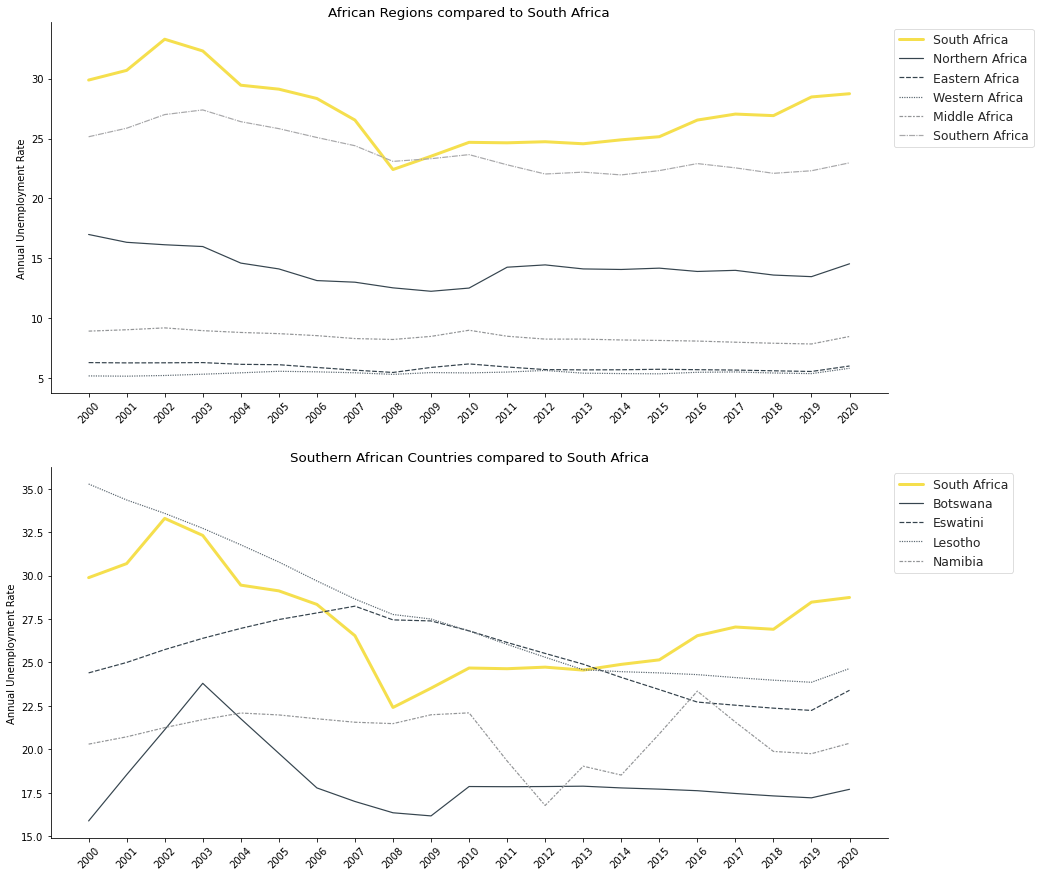

In [109]:
fig = plt.figure()
fig, (ax1, ax2)= plt.subplots(2, 1)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.set_context('paper', font_scale=1.4)
sns.set_style('white')
sns.despine(top=True, right=True, left=False, bottom=False )

plot1 = sns.lineplot(data=unempl_rsa, x='Year', y='South Africa',
                     color='#f5df4d', linewidth=3, ax=ax1, label='South Africa' )
plot1 = sns.lineplot(data=unempl_region, ax=ax1)

plot2 = sns.lineplot(data=unempl_rsa, x='Year', y='South Africa',
                     color='#f5df4d', linewidth=3, ax=ax2, label='South Africa' )
plot2 = sns.lineplot(data=unempl_sa_t, ax=ax2)


plot1.set_ylabel(ylabel='Annual Unemployment Rate')
plot1.set_xlabel(xlabel='')
plot1.set_xticklabels(unempl_region['Year'].to_list(), rotation=45, horizontalalignment='center')

plot2.set_ylabel(ylabel='Annual Unemployment Rate')
plot2.set_xlabel(xlabel='')
plot2.set_xticklabels(unempl_sa_t.index.to_list(), rotation=45, horizontalalignment='center')


ax1.legend(loc='upper left', bbox_to_anchor=(1,1))
ax2.legend(loc='upper left', bbox_to_anchor=(1,1))

ax1.set_title('African Regions compared to South Africa')
ax2.set_title('Southern African Countries compared to South Africa')

fig.show()

**Insights:**

> Evaluating the results, it is clear that the 
Southern African region has by far the highest unemployment rate, followed by the Northern African region.



> The Eastern- and Western regions are the best performers with unemployment rates around the 5% mark.  Middle Africa also records decent unemployment rates in the region of 10%. 



> South Africa, by comparison, fares even worse than the Southern African region, with unemployment rates soaring above that of the Southern African region. 

## Top Ten Economies in Africa

The South African economy is no doubt one of the larger as well as more sophisticated economies on the continent.  So to ensure that we 'compare apples with apples', let's find the top ten economies in terms of size and compare these. 

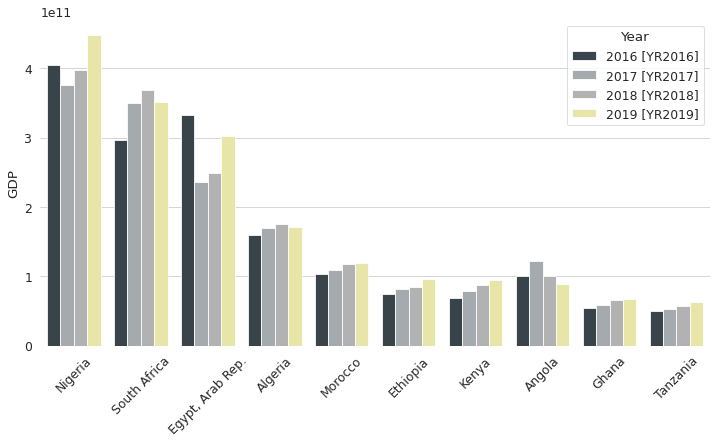

In [110]:
plt.figure(figsize=(12,6))

sns.set_context('paper', font_scale=1.4)
sns.set_style('whitegrid')

chart1 = sns.barplot(data=gdp_africa_10, x='Country Name', y='GDP', hue='Year', 
                     palette=palette_yr)
sns.despine(top=True, right=True, left=True, bottom=True )
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, 
                       horizontalalignment='center')
chart1.set_xlabel(xlabel='')
plt.show()

**Insights:**


> These economies vary quite a bit with Nigeria's GDP almost eight times the size of the smallest, Tanzania.


> Despite the variance, we will keep on comparing associated features to look at more similarities and/or variances.

## Unemployment in the Top Ten Economies

<Figure size 864x576 with 0 Axes>

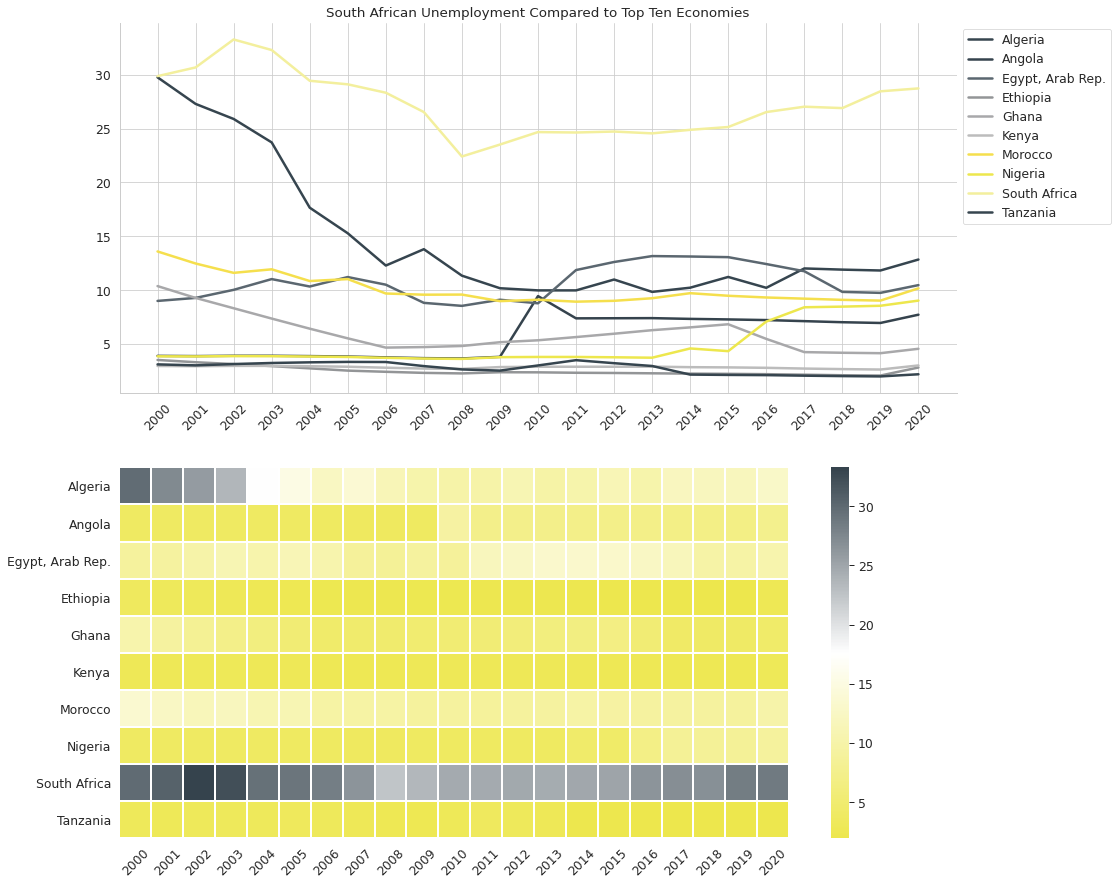

In [111]:
fig = plt.figure()
fig, axes = plt.subplots(2, 1)
fig.set_figheight(15)
fig.set_figwidth(15)


sns.set_style('white')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=False, bottom=False )

ax3 = axes[0]

for country in unempl_africa_10.index: 
  plot_line = unempl_africa_10.loc[country]
  plot1 = sns.lineplot(data=plot_line, palette='palette_cntr', linewidth=2.5, ax=ax3)

plot2 = sns.heatmap(unempl_africa_10, cmap=cmap, linecolor='white', linewidth=1, ax=axes[1] )

plot1.legend(unempl_africa_10.index.to_list(), loc='upper left', bbox_to_anchor=(1,1))
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='center')
plot1.set_title('South African Unemployment Compared to Top Ten Economies')
plot1.set_ylabel(ylabel='')

plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='center')
plot2.set_ylabel(ylabel='')

plt.show()

**Insights**


> Compared to the top ten economies in Africa and measured across 20 years, South Africa still stands out with much higher unemployment levels compared to the other 9 countries.

> The only similar data for unemployment is in Algeria, between 2000 to 2003

**Next Questions**


> Can South African unemployment be compared to these other African economies? 



> Are these economies similar and/or comparable to South Africa's economy ?





## Associated Factors

To answer the questions above, we will look at the 6 reasons provided by the South African Government to explain unemployment levels. 

For each of reasons I have selected one or more indicators from the ESG dataset.

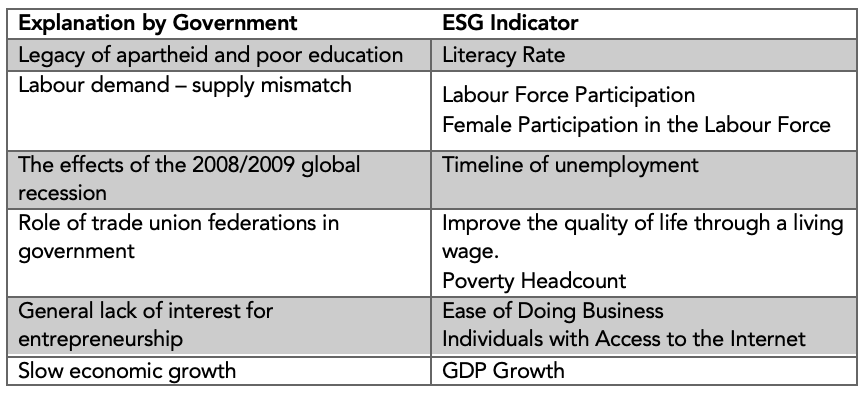

## Pearson Correlation Coefficient between the Associated Factors

Since the data consists of continuous numeric variables, we can perform a **Pearson Correlation Coefficient** test on the values to determine which of these factors, according to the data, has the highest correlation to unemployment. 

It is important to remember at this point that correlation does not necessarily imply causation.  

In [112]:
heatmap = indicators.corr()

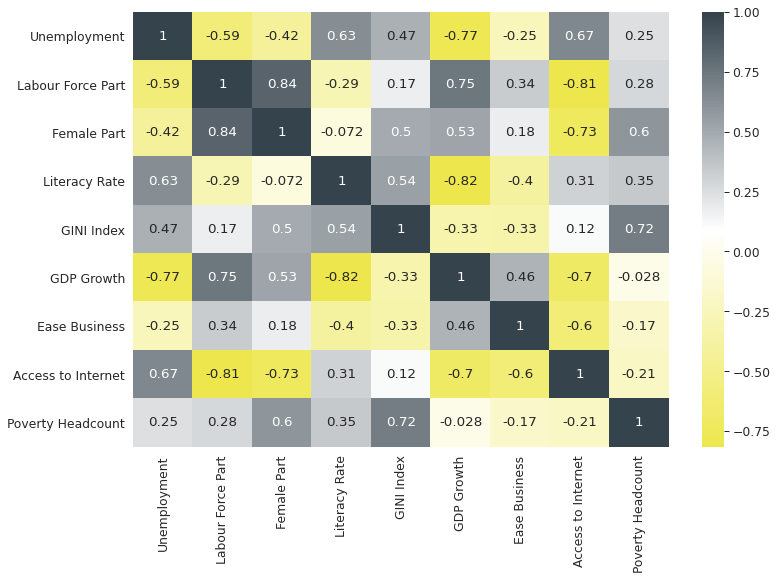

In [113]:
sns.heatmap(heatmap, annot=True, cmap=cmap)



> The highest correlation can be found between **unemployment** and **GDP growth** at -0.77. The negative relationship confirms that low GDP growth will cause high unemployment.  



> The second- and third highest correlations exist between **access to internet** and **literacy rate** and **unemployment**.  

## Compare the Associated Factors across Top Ten Economies 

<Figure size 864x576 with 0 Axes>

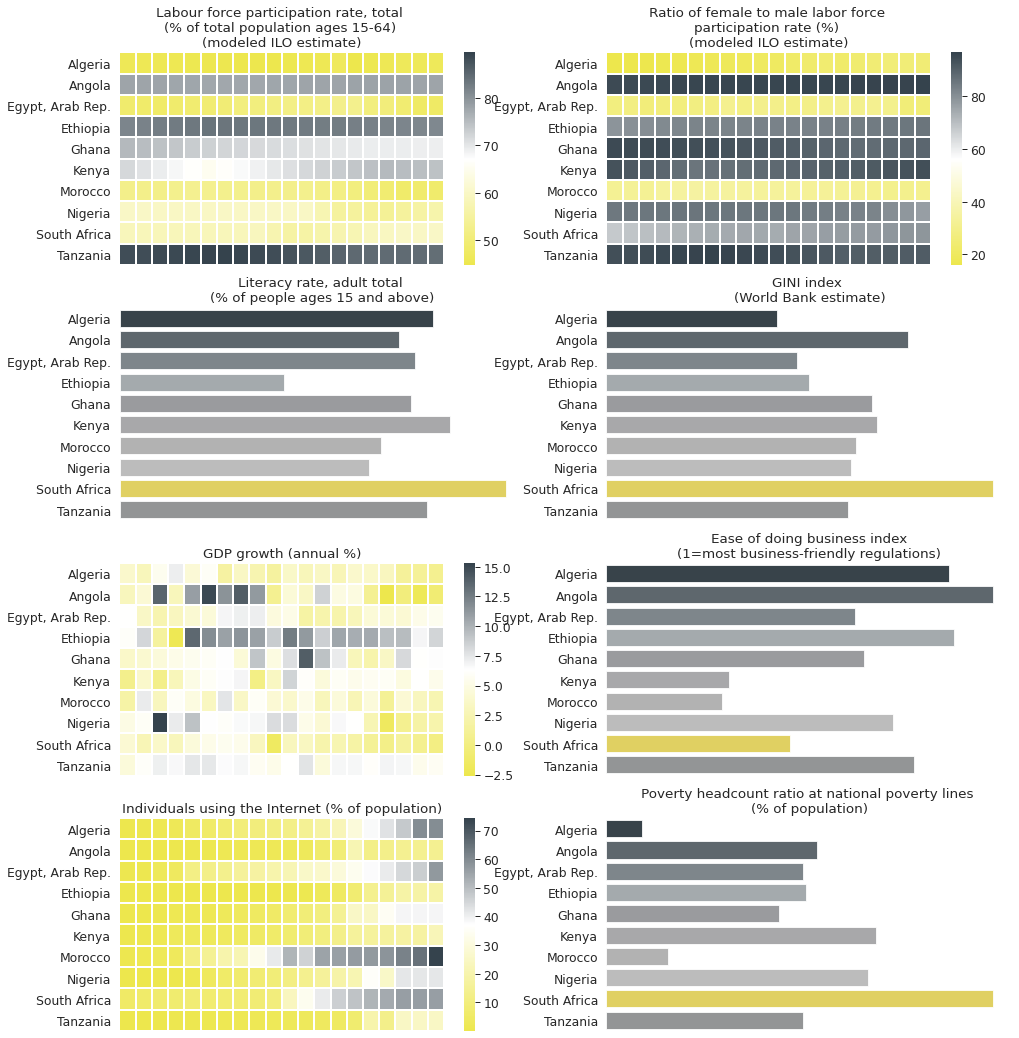

In [114]:
fig = plt.figure()
fig, axes = plt.subplots(4, 2)
fig.set_figheight(18)
fig.set_figwidth(16)

sns.set_context('paper', font_scale=1.4)
sns.set_style('white')

#plot [0,0]: 
plot1 = sns.heatmap(labourpart_africa, cmap=cmap, linecolor='white', linewidth=1, ax=axes[0,0])
plot1.set_xticklabels(labels='')
plot1.set_ylabel(ylabel='')
plot1.set_title('Labour force participation rate, total \n(% of total population ages 15-64) \n(modeled ILO estimate)', )
    
#plot [0,1]: Female Labour Participation
plot2 = sns.heatmap(femlab_africa, cmap=cmap, linecolor='white', linewidth=1, ax=axes[0,1])
plot2.set_xticklabels(labels='')
plot2.set_ylabel(ylabel='')
plot2.set_title('Ratio of female to male labor force \nparticipation rate (%) \n(modeled ILO estimate)')

#plot [1,0]: Literace Rate
plot3 = sns.barplot(x='Literacy Rate', y=litrate_africa.index,
                    data=litrate_africa, order=litrate_africa.index.unique(),
                    palette=palette_cntr, ax=axes[1,0])
plot3.set_ylabel(ylabel='')
plot3.set_xlabel(xlabel='')
plot3.set_xticklabels(labels='')
plot3.set_title('Literacy rate, adult total \n(% of people ages 15 and above)')

#plot [1,1]: GINI Index
plot4 = sns.barplot(x='GiniMean', y=gini_africa.index,
                    data=gini_africa, palette=palette_cntr, ax=axes[1,1])
plot4.set_ylabel(ylabel='')
plot4.set_xlabel(xlabel='')
plot4.set_xticklabels(labels='')
plot4.set_title('GINI index \n(World Bank estimate)')

#plot [2,0]: GDP Growth
plot5 = sns.heatmap(gdpgrowth_africa, cmap=cmap, linecolor='white', linewidth=1, ax=axes[2,0])
plot5.set_xticklabels(labels='')
plot5.set_ylabel(ylabel='')
plot5.set_title('GDP growth (annual %)', )

#plot [2,1]:
plot6 = sns.barplot(x='EaseBus', y=easebus_africa.index,
                    data=easebus_africa, palette=palette_cntr, ax=axes[2,1])
plot6.set_ylabel(ylabel='')
plot6.set_xlabel(xlabel='')
plot6.set_xticklabels(labels='')
plot6.set_title('Ease of doing business index\n(1=most business-friendly regulations)')


#plot [3,0]:
plot7 = sns.heatmap(internet_africa, cmap=cmap, linecolor='white', linewidth=1, ax=axes[3,0])
plot7.set_xticklabels(labels='')
plot7.set_ylabel(ylabel='')
plot7.set_title('Individuals using the Internet (% of population)' )

#plot [3,1]:
plot8 = sns.barplot(x='Poverty Rate', y=poverty_africa.index,
                    data=poverty_africa, palette=palette_cntr, ax=axes[3,1])
plot8.set_ylabel(ylabel='')
plot8.set_xlabel(xlabel='')
plot8.set_xticklabels(labels='')
plot8.set_title('Poverty headcount ratio at national poverty lines \n(% of population)')


sns.despine(top=True, right=True, left=True, bottom=True )

plt.show()

**Insights**



> Looking at **labour force participation** as a percentage of the total population, South Africa compares well with Nigeria and Morocco, while Algeria and Egypt has higher numbers while Ethiopia and Tanzania has the highest participation rates on the continent. 

> The ratio of **females partaking** in the job market in South africa is very similar to the rates in Ethiopia and Nigeria.

> South Africa's **literacy rate scores** far above the rest of the economies, with Ethiopia coming in last in this section. 

> The **GINI index** clearly illustrate the unequal nature of South Africa's economy, or as some refer to it, the **two-speed economy**.  A number of the other factors, like literacy, need to be interpreted side by side with this index. 

> **GDP growth** probably displays the most disheartening of numbers since ultimately, an economy needs to grow for jobs to be created, and South Africa's economy has not been growing nearly as fast as we need it to grow. The global economical crisis of 2008/9 as well as the rise of then President Jacob Zuma and state capture has stunted growth of the South African economy. Compared, however to the other top ten countries in Africa, South Africa does not look that bad. Except for Ethiopia, who has shown above average growth in the group, the rest of the economies seem to be growing at more or less the same pace as SA's. 


> Evaluating the **Ease of Doing Business** indicator, it is clear that this is something that needs urgent attemtion with 7 of the top economies trumping SA. 


> The onset of the 4th Industrial Revolution means that **Internet Access** for all is absolutely crucial first step.  This revolution, which is described as a fusion between our physical, digital, and biological worlds provides a unique opportunity for developing countries with the right infrastructure and skillsets to leapfrog past many developed economies. This is probably 'low hanging fruit' for South Africa, currently coming in only third in these economies in 2019.


> South Africa's **poverty headcount**, measured against a number of the other factors mentioned here, demonstrates the persistance of structural inequalities that haunts our nation.  There is no doubt that this is shameful and needs to be addressed as an absolute priority. 

















Based on the comparison of the factors associated with and contributing to unemployment in the top ten economies in Africa, I have narrowed the list down to 5 countries of which 3 are in Sub-Saharan Africa and 2 in Northern Africa.

Sub-Shahran African countries comparing best to South Africa are **Ghana, Kenya, Nigeria**.

Northern African countries comparing to South Africa based on the associated factors are **Egypt and Morocco**.

## Unemployment in the comparable countries

In [115]:
comparable_list1 = ['Ghana', 'Kenya', 'Nigeria', 'Egypt, Arab Rep.', 'Morocco', ]
comparable_list2 = ['Ghana', 'Kenya', 'Nigeria', 'Egypt, Arab Rep.', 'Morocco', 'South Africa']


## Investigate the reasons for unemployment 

### Legacy of Apartheid & Poor Education

Although the legacy of apartheid is unique to South Africa, we can compare poor education by looking at the Literacy Rate

In [116]:
root1_df = indicators[indicators.index.isin(comparable_list2)]
root1_df = root1_df[['Unemployment', 'Literacy Rate']]
root1_df.reset_index(inplace=True)
root1_df

,Country Name,Unemployment,Literacy Rate
0,"Egypt, Arab Rep.",10.683333,70.537663
1,Ghana,5.969524,69.478060
2,Kenya,2.818095,78.663530
3,Morocco,10.060000,62.299568
4,Nigeria,4.898095,59.516299
5,South Africa,27.233333,92.109441


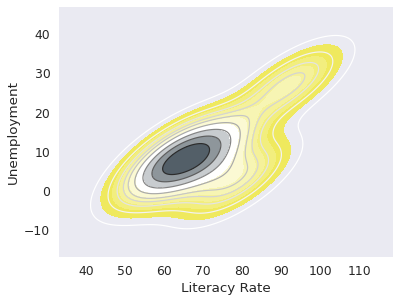

In [134]:
# Set up the figure
f, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")

sns.set_theme(style='dark')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=True, bottom=True )

#draw the plot
sns.kdeplot(
    data=root1_df,
    x='Literacy Rate',
    y='Unemployment'"",
    shade=True,
    #cbar=True,
    cmap=cmap,
    thresh=.1,
)
sns.kdeplot(
    data=root1_df, 
    x='Literacy Rate',
    y='Unemployment', 
    cmap='Greys'
)

plt.show()

** Insights**

> From the kde plot a high literacy rate does not seem to be imperative to acceptable levels of employment.




### Labour demand and supply mismatch

In [118]:
root0_df = unempl_africa_10[unempl_africa_10.index.isin(comparable_list2)]
root0_df = transpose_data(root0_df, 'Unemployment', 'Country Name', 'Year')
root0_df.head(2)

,Country Name,Year,Unemployment
0,"Egypt, Arab Rep.",2000,8.98
1,"Egypt, Arab Rep.",2001,9.26


In [119]:
root2_1_df = labourpart_africa[labourpart_africa.index.isin(comparable_list2)]
root2_1_df = transpose_data(root2_1_df, 'Labour Participation', 'Country Name', 'Year')
root2_1_df.head(2)

,Country Name,Year,Labour Participation
0,"Egypt, Arab Rep.",2000,48.950001
1,"Egypt, Arab Rep.",2001,48.580002


In [120]:
root2_2_df = femlab_africa[femlab_africa.index.isin(comparable_list2)]
root2_2_df = transpose_data(root2_2_df, 'Female Labour Participation', 'Country Name', 'Year')
root2_2_df.head(2)

,Country Name,Year,Female Labour Participation
0,"Egypt, Arab Rep.",2000,27.400469
1,"Egypt, Arab Rep.",2001,28.139013


In [121]:
root2_df = root0_df.merge(root2_1_df, on=['Country Name', 'Year'])
root2_df = root2_df.merge(root2_2_df, on=['Country Name', 'Year'])
root2_df.head()

,Country Name,Year,Unemployment,Labour Participation,Female Labour Participation
0,"Egypt, Arab Rep.",2000,8.98,48.950001,27.400469
1,"Egypt, Arab Rep.",2001,9.26,48.580002,28.139013
2,"Egypt, Arab Rep.",2002,10.01,48.220001,26.337852
3,"Egypt, Arab Rep.",2003,11.01,48.700001,26.723062
4,"Egypt, Arab Rep.",2004,10.32,49.180000,27.190083


<Figure size 864x576 with 0 Axes>

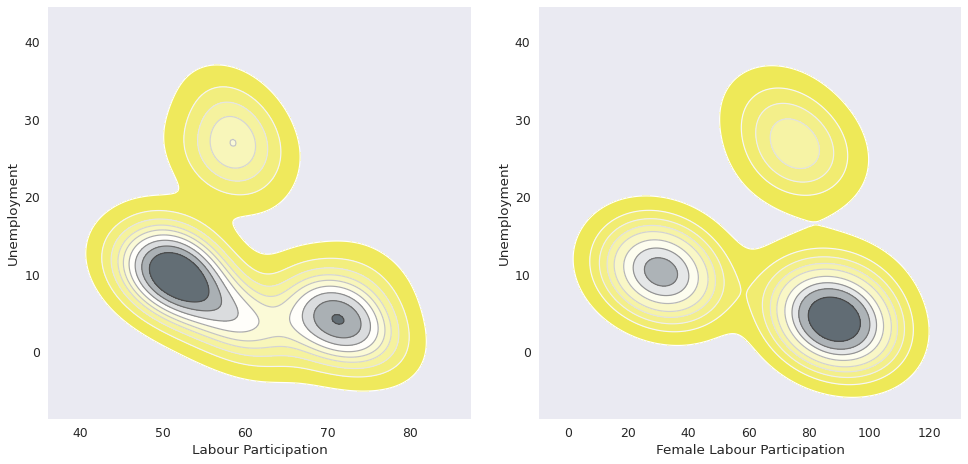

In [122]:
# Set up the figure
fig = plt.figure()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(14,7))

sns.set_theme(style='dark')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=True, bottom=True )

plot1 = sns.kdeplot(
    data=root2_df, x='Labour Participation', y='Unemployment',
    cmap=cmap, fill=True, ax=ax1    #shade=True, thresh=.1, 
)
plot1 = sns.kdeplot(
    data=root2_df, x='Labour Participation', y='Unemployment', 
    cmap='Greys', ax=ax1
)

plot2 = sns.kdeplot(
    data=root2_df, x='Female Labour Participation', y='Unemployment',
    cmap=cmap, fill=True, ax=ax2    #shade=True, thresh=.1, 
)
plot2 = sns.kdeplot(
    data=root2_df, x='Female Labour Participation', y='Unemployment', 
    cmap='Greys', ax=ax2
)
plt.tight_layout(pad=2)
plt.show()

**Insights**


> Combining the data from the 5 most comparable economies in Africa, greater labour participation (both male and female) does not automatically lead to higher unemployment. 



### The effects of the 2008/2009 global recession

In [123]:
comparable_unempl = unempl_africa_10[unempl_africa_10.index.isin(comparable_list1)]
comparable_unempl = comparable_unempl.transpose()


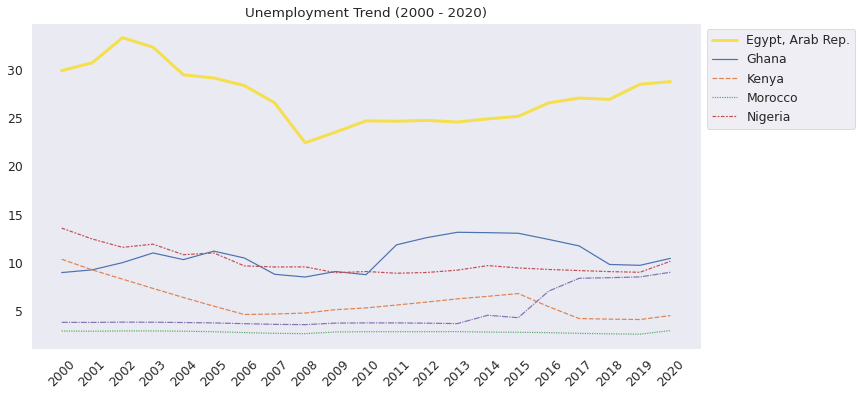

In [124]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_context('paper', font_scale=1.4)
sns.set_style('dark')
sns.despine(top=True, right=True, left=False, bottom=False )

plot1 = sns.lineplot(data=unempl_rsa, x='Year', y='South Africa',
                     color='#f5df4d', linewidth=3, label='South Africa' )

plot1 = sns.lineplot(data=comparable_unempl)

plot1.set_ylabel(ylabel='')
plot1.set_xlabel(xlabel='')
plot1.legend(comparable_unempl.columns.to_list(), loc='upper left', bbox_to_anchor=(1,1))
plot1.set_title('Unemployment Trend (2000 - 2020)')

plot1.set_xticklabels(comparable_unempl.index.to_list(), rotation=45, horizontalalignment='center')

plt.show()

**Insights**


> Looking at unemployment trend over the last 20 years, it is clear that South Africa was adversely affected during the 2008/9 global recession. 


> The Arab Rep of Egypt shows a similar decline following the 2008/9 recession, although they were able to curb and reverse the trend from 2013 onward to where they are back to approx. similar levels of unemployment to 2003. 


### Role of Trade Union Federations

In [125]:
root4_df = poverty_africa[poverty_africa.index.isin(comparable_list2)]

Text(0.5, 1.0, 'Poverty headcount ratio at national poverty lines \n(% of population)')

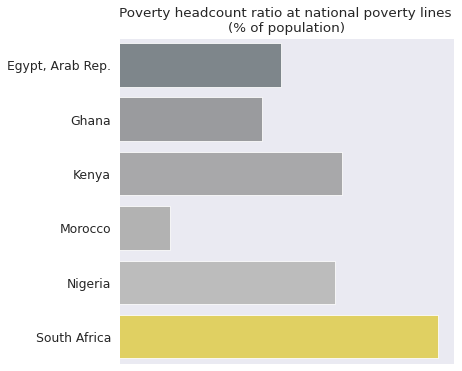

In [126]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(6)

sns.set_context('paper', font_scale=1.4)
sns.set_style('dark')

plot4 = sns.barplot(x='Poverty Rate', y=root4_df.index,
                    data=root4_df, palette=palette_cntr)
plot4.set_ylabel(ylabel='')
plot4.set_xlabel(xlabel='')
plot4.set_xticklabels(labels='')
plot4.set_title('Poverty headcount ratio at national poverty lines \n(% of population)')

**Insights**


> If the argument that South Africa's Trade Union Federations were really making life better for workers in South Africa, that evidence would show up in the Poverty Headcount. The data shows that to not be true. 



### General lack of interest in Entrepreneurship 

According to government, there is a general lack of interest in Entrepreneurship in South Africa. 
We will compare two indicators, Ease of Doing Business and Access to the Internet and see what the relationship is between these factors and unemployment in the 5 comparable countries. 

First, let's compare Ease of Doing Business

In [127]:
root5_1_df = indicators[indicators.index.isin(comparable_list2)]
root5_1_df = root5_1_df[['Unemployment', 'Ease Business', 'Access to Internet']]
root5_1_df.reset_index(inplace=True)

In [128]:
root5_2_df = internet_africa[internet_africa.index.isin(comparable_list2)]
root5_2_df = transpose_data(root5_2_df, 'Internet Access', 'Country Name', 'Year')
root5_2_df = root0_df.merge(root5_2_df, on=['Country Name', 'Year'])

<Figure size 864x576 with 0 Axes>

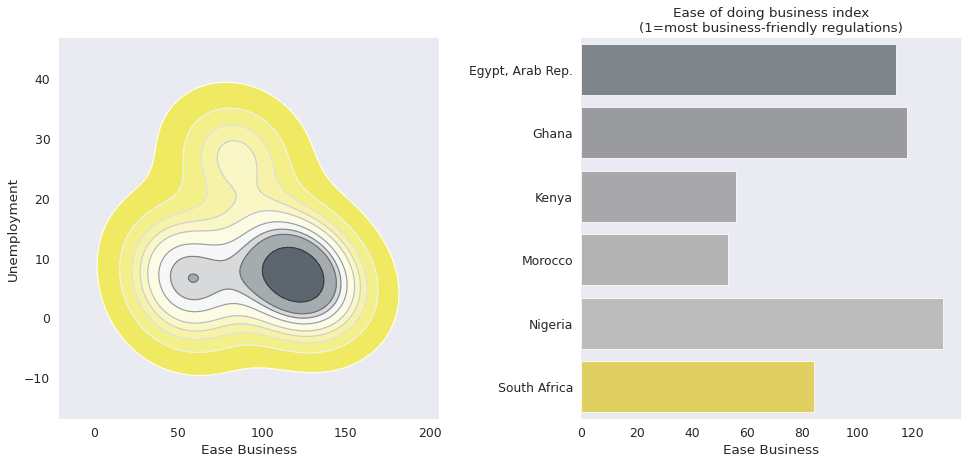

In [129]:
# Set up the figure
fig = plt.figure()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(14,7))

sns.set_theme(style='dark')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=True, bottom=True )

plot1 = sns.kdeplot(
    data=root5_1_df, x='Ease Business', y='Unemployment',
    cmap=cmap, fill=True, ax=ax1    #shade=True, thresh=.1, 
)
plot1 = sns.kdeplot(
    data=root5_1_df, x='Ease Business', y='Unemployment', 
    cmap='Greys', ax=ax1
)

plot2 = sns.barplot(x='Ease Business', y='Country Name',
                    data=root5_1_df, palette=palette_cntr, ax=ax2)
plot2.set_ylabel(ylabel='')
#plot2.set_xlabel(xlabel='')
#plot2.set_xticklabels(labels='')
plot2.set_title('Ease of doing business index\n(1=most business-friendly regulations)')

plt.tight_layout(pad=2)
plt.show()

**Insights**

> Comparing the 5 most similar countries to SA, 3 make it easier to do business in their country than SA.  This could very well be contributing to the shortage of initiative and entrepreneurship.

> In countries where the entry barriers to starting a business is lower, the comparative unemployment levels are lower. 

Second we can assess the role that Access to the Internet plays. 

<Figure size 864x576 with 0 Axes>

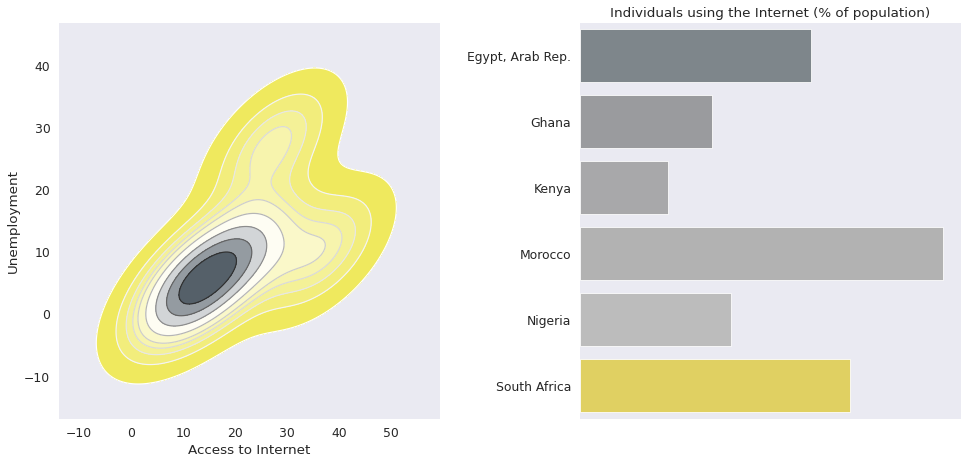

In [130]:
# Set up the figure
fig = plt.figure()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(14,7))

sns.set_theme(style='dark')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=True, bottom=True )

plot1 = sns.kdeplot(
    data=root5_1_df, x='Access to Internet', y='Unemployment',
    cmap=cmap, fill=True, ax=ax1    #shade=True, thresh=.1, 
)
plot1 = sns.kdeplot(
    data=root5_1_df, x='Access to Internet', y='Unemployment', 
    cmap='Greys', ax=ax1
)

plot2 = sns.barplot(x='Access to Internet', y='Country Name',
                    data=root5_1_df, palette=palette_cntr, ax=ax2)
plot2.set_ylabel(ylabel='')
plot2.set_xlabel(xlabel='')
plot2.set_xticklabels(labels='')
plot2.set_title('Individuals using the Internet (% of population)')


plt.tight_layout(pad=2)
plt.show()

**Insights:**


> Access to the Internet does not seem to be a big factor that contributes to unemployment. 

> Although access to the Internet alone does not reduce unemployment, it does widen up  opportunities for entrepreneurship. SA has the second highest accessability to the internet.  



### Slow economic growth

GDP growth showed the highest correlation to unemployment across the top ten economies. Now, let's compare GDP growth in the 5 most similar economies. 

In [131]:
gdpgrowth_africa
root6_1_df = gdpgrowth_africa[gdpgrowth_africa.index.isin(comparable_list2)]
root6_1_df = transpose_data(root6_1_df, 'GDP Growth', 'Country Name', 'Year')
root6_1_df = root6_1_df.merge(root0_df, on=['Country Name', 'Year'])
root6_1_df.head(2)

,Country Name,Year,GDP Growth,Unemployment
0,"Egypt, Arab Rep.",2000,6.370004,8.98
1,"Egypt, Arab Rep.",2001,3.535252,9.26


In [132]:
root6_2_df = gdpgrowth_africa[gdpgrowth_africa.index.isin(comparable_list2)]
root6_2_df = root6_2_df.transpose()
root6_2_df.head(2)

Country Name,"Egypt, Arab Rep.",Ghana,Kenya,Morocco,Nigeria,South Africa
2000,6.370004,3.7,0.599695,1.912873,5.015935,4.200003
2001,3.535252,4.0,3.779906,7.319967,5.917685,2.699995


In [137]:
print(root6_1_df['Country Name'].to_list())

['Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Morocco', 'Nigeria', 'Nigeria

<Figure size 864x576 with 0 Axes>

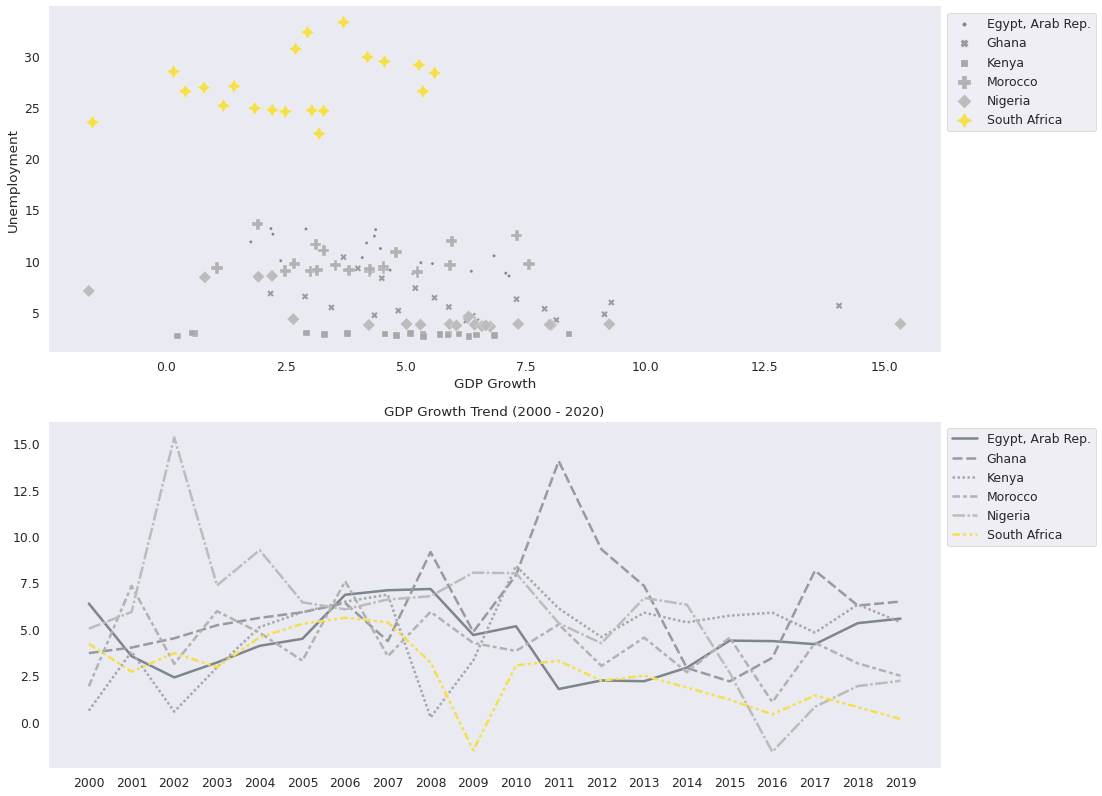

In [138]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1)

fig.set_figheight(14)
fig.set_figwidth(16)

sns.set_theme(style='dark')
sns.set_context('paper', font_scale=1.4)
sns.despine(top=True, right=True, left=False, bottom=False )


plot1 = sns.scatterplot(data=root6_1_df, x='GDP Growth', y='Unemployment', 
            hue='Country Name', style= 'Country Name', size="Country Name", sizes=(200, 10), 
            palette=palette_cntr, ax=ax1)
plot1.legend(loc='upper left', bbox_to_anchor=(1,1))

plot2 = sns.lineplot(data=root6_2_df, palette=palette_cntr, linewidth=2.5, ax=ax2)

plot2.set_ylabel(ylabel='')
plot2.set_xlabel(xlabel='')
plot2.legend(root6_2_df.columns.to_list(), loc='upper left', bbox_to_anchor=(1,1))
plot2.set_title('GDP Growth Trend (2000 - 2020)')

plt.show()


**Insights**


> South Africa's GDP growth was hampered by the 2008/9 global recession and despite having bounced back in 2010, it has been on a steady decline since then. 

> Looking at the scatterplot though, South Africa's GDP growth is not completely out of bounds when compared to the similar economies and as was seen previously, the comparable economies does not display such high numbers of unemployment.  



# Conclusion

In order to solve a problem, one needs, among other things, a good understanding of the root causes of a problem. The results displayed in this analysis does not seem to support the official reasons given for unemployment.  

What did became clear from this analysis, though, is that South Africa is not as different from its African neighbours as is sometimes believed. 

Africa is a unique continent and we might find it usefull to look at our neighbours for successful and best practices that lead to improved employment and a better life for all.
